# **AI Project #3: Test Your Knowledge: Wine Quality**

<div class="alert alert-block alert-info">

Author: Sofía Vega

</div>

---

In [1]:
from IPython.display import display, HTML

# **1. Wine Quality Dataset: Context and Importance**

<div style='text-align: justify;'>
<p>

The Wine Quality dataset originates from the Vinho Verde region in northwest Portugal, a territory well known for producing light and refreshing wines. Donated to the UCI Machine Learning Repository in 2009, this dataset represents a valuable contribution to the intersection of data science and oenology. It includes physicochemical analyses of 6,497 wine samples (comprising 4,898 white wines and 1,599 red wines) each rated by wine experts on a quality scale from 0 to 10. While details such as grape variety, brand, and pricing are omitted to protect trade secrets, the dataset focuses on measurable chemical properties and their correlation to expert sensory evaluations. Below is a description of each property and its corresponding meaning:

</p>
</div>

<br>

<div align="center">

| **Variable**             | **What does it measure?**                                                                                      | **Importance**                                                                                                                                         |
|--------------------------|----------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fixed acidity**        | Concentration of non-volatile acids (e.g., tartaric acid) remaining after fermentation.                        | Affects taste, structure, and stability. Too high: overly acidic; too low: lacks freshness. [1]                                                           |
| **Volatile acidity**     | Amount of volatile acids (mainly acetic acid) that can evaporate and cause vinegar smells.                     | High values suggest fermentation/storage issues and reduce perceived quality. [2]                                                                        |
| **Citric acid**          | Concentration of citric acid in the wine.                                                                      | Adds freshness and fruitiness; moderate levels improve aroma and preservation.  [3]                                                                       |
| **Residual sugar**       | Sugar remaining after fermentation (g/L).                                                                      | Defines wine sweetness; high values increase density and body perception.  [4]                                                                            |
| **Chlorides**            | Concentration of salts, mainly sodium chloride (g/L).                                                          | Moderate levels enhance flavor; excessive amounts cause salty or unpleasant taste. [5]                                                                     |
| **Free sulfur dioxide**  | Amount of unbound SO₂ (mg/L).                                                                                  | Acts as antimicrobial and antioxidant; excess can cause pungent smell and sensitivity. [6]                                                                |
| **Total sulfur dioxide** | Total SO₂ (free + bound) in mg/L.                                                                              | Indicates overall sulfur usage; helps assess preservation practices. [7]                                                                                  |
| **Density**              | Volumetric density of the wine (g/cm³), affected by alcohol and dissolved solids.                              | Might reflect overall chemical composition.                                                                      |
| **pH**                   | Acidity/alkalinity level (0–14 scale).                                                                         | Impacts color, stability, and freshness. Low pH: fresher wine; high pH: microbial risk. [8]                                                                |
| **Sulphates**            | Concentration of sulfates (e.g., potassium sulfate) in g/L.                                                    | Supports yeast health; moderate levels improve structure, but excess may cause bitterness. [9]                                                            |
| **Alcohol**              | Ethanol content (% by volume).                                                                                 | Influences body, warmth, and flavor perception. Balance is key—too much or too little can disrupt harmony. [10]                                          |
| **Quality**              | Human-assigned rating (0–10, often 5–7).                                                                        | Target variable for prediction models; represents final sensory judgment.                                                                                |
| **Color**                | Categorical indicator (red or white wine).                                                                     | Distinguishes winemaking types; helps segment or compare.                                                                                                |

Table 1. Dataset Variables

</div>

<br>

<div style='text-align: justify;'>
<p>

The classification of wine quality holds significant value, particularly for the wine industry. Economically, it enables producers to optimize pricing strategies, identify products with premium potential, reduce unnecessary aging and storage costs, and enhance overall production efficiency. By predicting the quality of a wine early in the process, winemakers can allocate resources more effectively and minimize waste.

From a production standpoint, the use of automated quality assessment systems introduces objective evaluation criteria that complement traditional sensory methods. These systems support real-time monitoring and quality control during the manufacturing process, helping ensure batch consistency and allowing for early detection of quality-related issues before bottling.

Beyond industrial benefits, the dataset is highly valuable for scientific research. It provides a benchmark for machine learning algorithms and supports the study of relationships between chemical properties and perceived wine quality. Researchers can explore feature importance to determine which physicochemical variables most influence quality ratings, and they can develop predictive models capable of generalizing to new, unseen wine samples.

Consumers also benefit from wine quality classification systems. With access to more transparent quality indicators, they can make informed purchasing decisions and trust the consistency of what they buy. This not only improves customer satisfaction but also enhances transparency and trust in the wine market.

</p>
</div>

# 2. **Problem Development**

## **2.1 Data Preparation**

In this section, we load the dataset into a DataFrame for further use. We begin with an initial preparation step to ensure the data is ready for analysis, including checking for null values and other potential issues. Then, we conduct exploratory data analysis (EDA) to observe patterns and understand any trends present in the data before implementing our models.

### Import Modules

Here we import the required modules for the data analysis  and model development, next to each module its description of use.

In [2]:
# === Core Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# === Jupyter Settings ===
%matplotlib inline

# === Scikit-learn Utilities ===
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.base import clone

# === Metrics & Evaluation ===
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, roc_auc_score, 
    roc_curve, classification_report, make_scorer
)

# === Models ===
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# === Dimensionality Reduction & Statistics ===
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import ttest_rel, wilcoxon, friedmanchisquare


### Load dataset

In this step, we load the dataset by combining the red and white wine CSV files located in the same folder.

In [3]:
# 1. Load the red‐wine CSV and add a “color” column
red_df = pd.read_csv('winequality-red.csv', sep=';')
red_df['color'] = 'red'

# 2. Load the white‐wine CSV and add a “color” column
white_df = pd.read_csv('winequality-white.csv', sep=';')
white_df['color'] = 'white'

# 3. Concatenate the two DataFrames into a single DataFrame
df = pd.concat([red_df, white_df], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Dataset Overview and Initial Diagnostics

In this section, we perform a basic overview of the dataset to better understand its structure and quality.

* We begin by displaying summary statistics for all numerical features using `df.describe()`, which provides key insights such as the mean, standard deviation, and range of values.
* We then examine the data types and non-null counts for each column using `df.info()`, helping us identify potential formatting issues or unexpected data types.
* Finally, we check for missing values in the dataset with `df.isnull().sum()`, allowing us to detect any incomplete entries that may require imputation or removal during preprocessing.


In [4]:
# Statistical summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The statistical summary of the dataset reveals the central tendencies and dispersion of the wine features. Most variables, such as *fixed acidity*, *citric acid*, and *alcohol*, show moderate variation, while features like *residual sugar* and *total sulfur dioxide* exhibit significant spread, as seen in their high standard deviations and large gaps between minimum and maximum values. The *alcohol* content ranges from 8.0% to 14.9%, with an average of approximately 10.5%, indicating a diverse set of wine samples. The *quality* variable, used as the target, ranges from 3 to 9, with a median value of 6, suggesting a slight skew toward mid-range quality levels.

In [5]:
# Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


All columns in the dataset are of type `float64`, except for two:

* **`quality`**, which is an `int64` column representing the wine quality score.
* **`color`**, which is an `object` (string) column indicating the type of wine—either `'red'` or `'white'`.

## Dataset Preprocessing

In [6]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

There are no missing values in the dataset, so we can skip preprocessing steps like imputation or deletion and move directly to the exploratory data analysis.

## Explorarory Data Analysis (EDA)

To better understand the dataset, we begin by examining the distribution of each numerical feature using boxplots. These visualizations allow us to quickly identify key statistical properties such as the **median**, **interquartile range (IQR)**, and the presence of **potential outliers**. This step is essential before applying any machine learning models, as it highlights variations in scale, skewness, and the potential need for normalization or transformation.

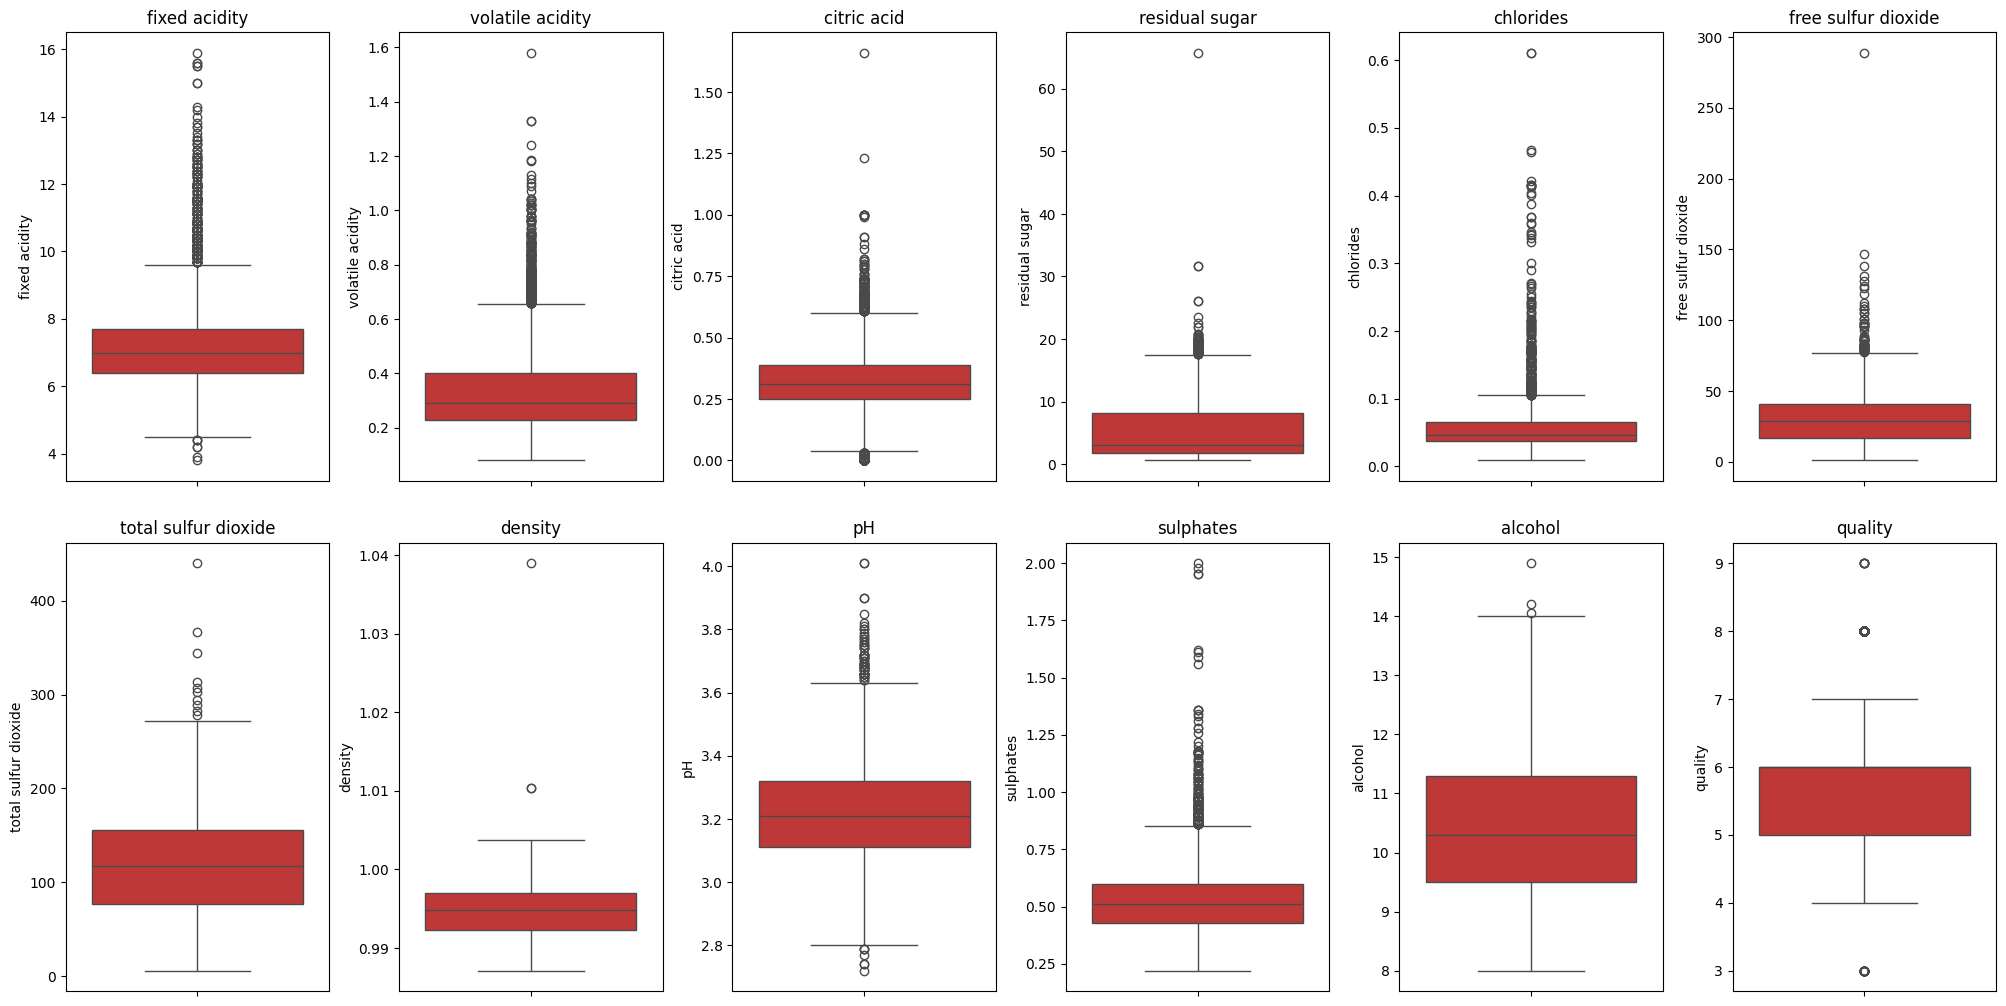

In [7]:
# Create a 2×6 grid of subplots with a large figure size
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))

# Flatten the 2×6 array of Axes into a 1D list for easy indexing
ax = ax.flatten()

# Index counter for selecting the current subplot
index = 0

# Get a specific red tone from the palette
red_color = sns.color_palette("Reds")[4]  

# Loop over each column in the DataFrame
for col, value in df.items():
    if col != 'color':  # Skip the categorical 'color' column
        # Draw a boxplot for the current numeric column 
        sns.boxplot(y=col, data=df, ax=ax[index], color=red_color)
        ax[index].set_title(col)
        index += 1  # Move to the next subplot

# Adjust spacing between subplots to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=2.5)

# Display all boxplots
plt.show()



The boxplots offer a clear overview of the distribution of each numerical feature in the dataset:

* **Outliers** are present in almost all variables. Additionally, most features exhibit long upper tails, indicating right-skewed distributions.
* **Fixed acidity**, **volatile acidity**, and **chlorides** show numerous outliers concentrated above the upper quartile, suggesting the presence of high-value anomalies that could affect modeling.
* The **density** variable is very narrowly distributed, ranging approximately between 0.99 and 1.004, which is expected for wine and indicates minimal variance.
* **Alcohol** shows a wider distribution compared to other variables, with a few mild outliers on the higher end.
* The **quality** variable is roughly centered between 5 and 6, confirming a class imbalance where most samples fall in the mid-range of the quality scale (5–7). Only a few extreme values are present.


To further analyze our data, we will now generate a **distribution plot (in histogram mode)** for each numerical column in the dataset. This visualization helps us understand the **frequency of values**, as well as key characteristics of the data distribution such as **skewness** and **kurtosis**.

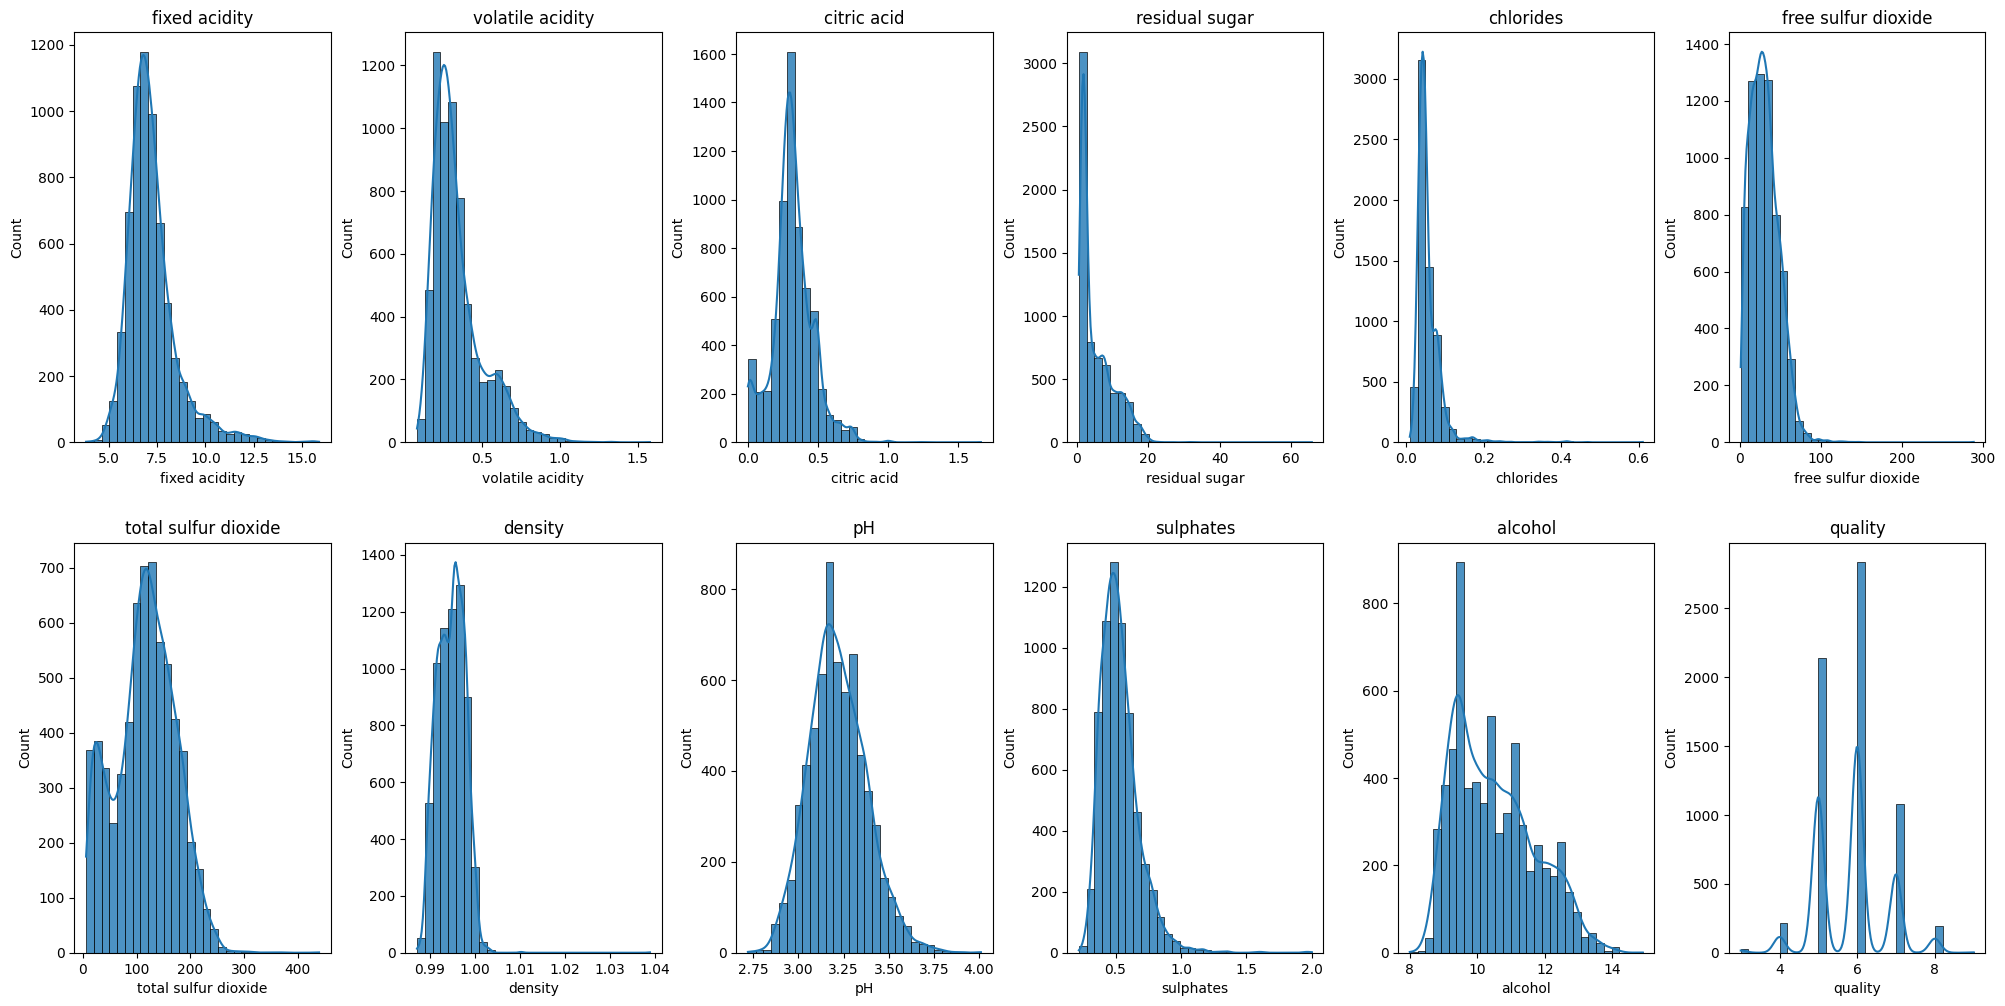

In [8]:
# Create a 2×6 grid of subplots with specified figure size
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))

# Flatten the array of Axes for easy indexing
ax = ax.flatten()

# Initialize index for subplot placement
index = 0

# Iterate over each column in the DataFrame
for col, value in df.items():
    # Skip the 'color' column (categorical)
    if col != 'color':
        # Plot histogram with KDE using histplot
        sns.histplot(value, kde=True, ax=ax[index], bins=30, alpha=0.8)
        ax[index].set_title(col)
        index += 1

# Adjust spacing to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=2.5)

# Show the plots
plt.show()

The histograms reveal important details about the shape and spread of each feature’s distribution in the dataset:

* **Most variables are right-skewed**, with long tails toward higher values. This is particularly noticeable in **free sulfur dioxide**. This skewed distribution suggests a need for **transformation** before applying distance-based models like KNN.

* **Alcohol** exhibits a multimodal pattern with a longer right tail. This may indicate the presence of multiple subgroups or wine types with different alcohol content ranges.

* **Quality**, the target variable, is clearly **discrete and imbalanced**. The majority of samples fall between scores **5, 6, and 7**, with very few instances below 4 or above 8. 


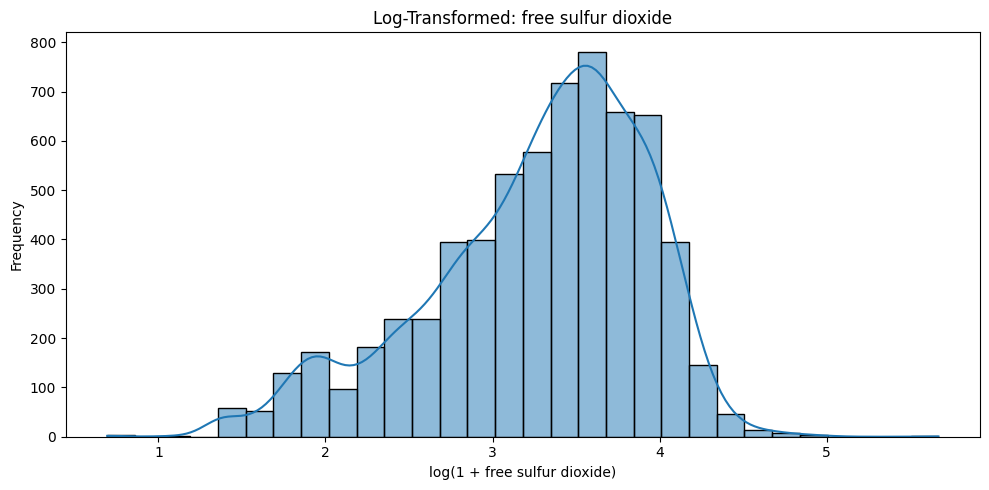

In [9]:
# List of skewed columns to transform
cols_to_transform = ['free sulfur dioxide']

# Apply log(1 + x) transformation to reduce skewness
for col in cols_to_transform:
    df[col] = np.log1p(df[col])

# Plot the transformed distributions
plt.figure(figsize=(10, 5))

for i, col in enumerate(cols_to_transform):
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Log-Transformed: {col}')
    plt.xlabel(f'log(1 + {col})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Now, we will explore the distribution of wine colors in the dataset by checking how many samples correspond to white and red wines. This will help us understand the balance between both types and whether there is any visible correlation between **color** and **quality scores**. Since color is a categorical feature, we will use bar plots and boxplots to compare the distribution of quality scores across red and white wines.

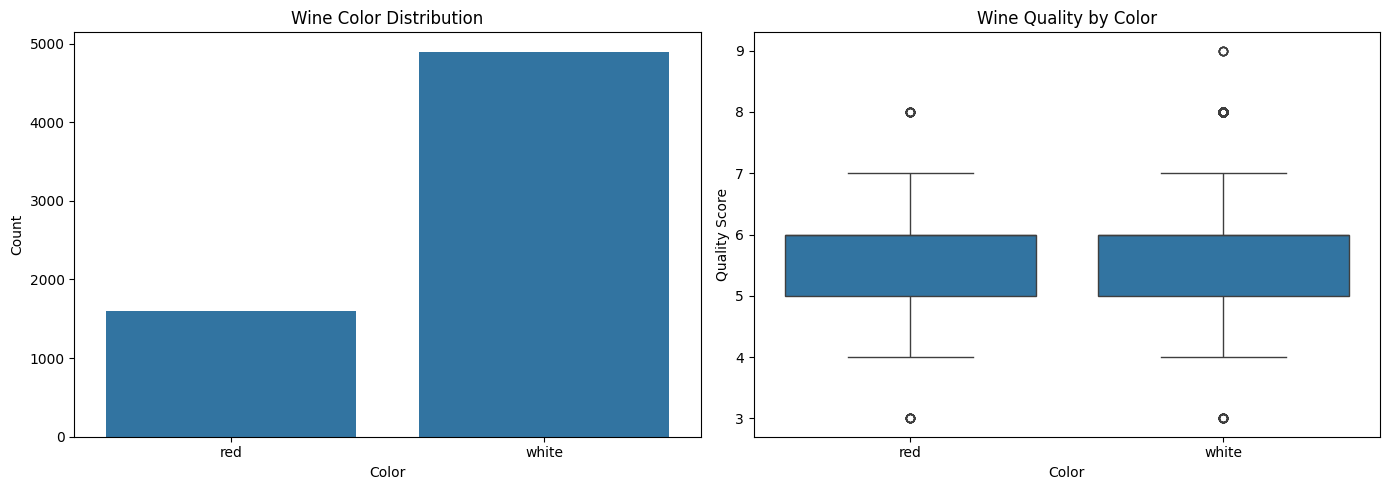

In [10]:
# Create figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of wine samples by color
sns.countplot(data=df, x='color', ax=ax[0])
ax[0].set_title('Wine Color Distribution')
ax[0].set_xlabel('Color')
ax[0].set_ylabel('Count')

# Plot 2: Distribution of quality scores by wine color
sns.boxplot(data=df, x='color', y='quality', ax=ax[1])
ax[1].set_title('Wine Quality by Color')
ax[1].set_xlabel('Color')
ax[1].set_ylabel('Quality Score')

plt.tight_layout()
plt.show()

The graphs show that there is noticeably more **white wine** than **red wine** in the dataset. However, the **quality distributions** for both types appear very similar, with both centered around scores **5 and 6**. This suggests that, on average, neither red nor white wines tend to have inherently better quality. While white wine displays a few high-quality outliers, their presence is minimal and likely **negligible** in terms of overall distribution. Therefore, **wine color does not appear to be a strong predictor of quality**.


## Correlation Matrix

We now build a correlation matrix using all numerical features, excluding the categorical `color` column. This matrix will help us identify **how strongly each variable is related to wine quality**, as well as detect **multicollinearity** between predictors.
By analyzing the correlations, we can determine which features have **little or no influence on quality**, and consider removing or deprioritizing them during modeling.

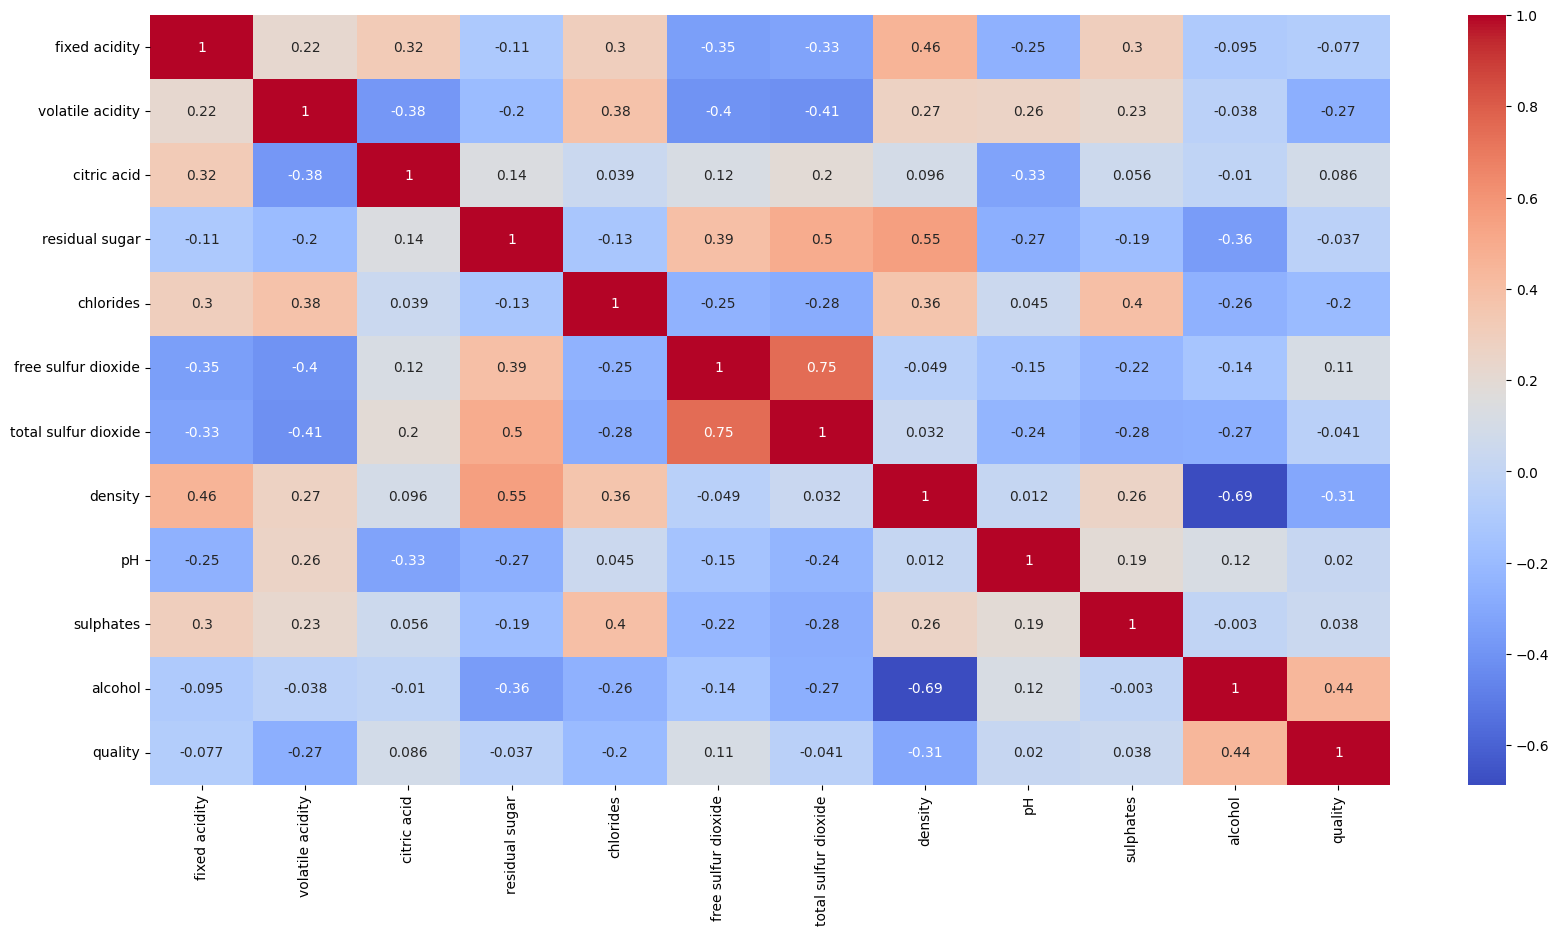

In [11]:
# Drop the 'color' column 
numeric_df = df.drop('color', axis=1)

# Calculate correlation matrix for numeric columns only
corr = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix reveals that most features have a **weak correlation with wine quality**, with only a few variables showing noticeable relationships:

- **Alcohol** has the strongest positive correlation with quality (**0.44**), suggesting higher alcohol content is associated with better-rated wines.
- **Volatile acidity** shows a moderate **negative** correlation (**–0.27**), indicating that higher acidity may reduce perceived quality.
- Other features like `sulphates`, `citric acid`, and `free sulfur dioxide` have **very low correlation** values (close to zero), implying limited direct influence on quality.
- `Residual sugar`, `density`, and `pH` exhibit **negligible correlation**, suggesting they may be **less relevant for quality prediction**.

## Wine Quality Distribution

We will now visualize the distribution of wine quality scores to better understand how samples are spread across the rating scale. This step is essential before categorizing wines into broader groups.

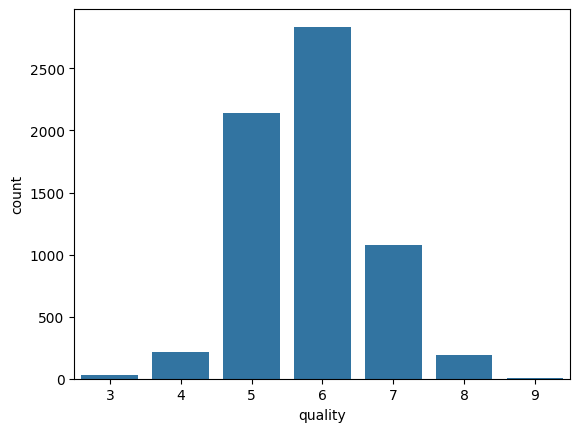

In [12]:
# Wine quality histogram
sns.countplot(x='quality', data=df)
plt.show()

Since most wines are rated between 4 and 8, and the distribution is heavily concentrated around scores 5, 6, and 7, we aim to group the samples into three balanced quality categories:

- **Low**: ratings 0 to 5  
- **Standard**: rating 6  
- **Premium**: ratings 7 and above

This transformation allows us to simplify the prediction task into a **multiclass classification problem** with meaningful and balanced labels.

In [13]:
# Define a function to map numeric quality scores (0–10) to three classes:

def categorize_quality(q):
    if q <= 5:
        return 'low_quality'
    elif q <= 6:
        return 'standard_quality'
    else:
        return 'premium_quality'

# Apply the function to create a new column called “quality_class”
df['quality_class'] = df['quality'].apply(categorize_quality)

# Verify the distribution of the new classes
print(df['quality_class'].value_counts())

y = df['quality_class']


quality_class
standard_quality    2836
low_quality         2384
premium_quality     1277
Name: count, dtype: int64


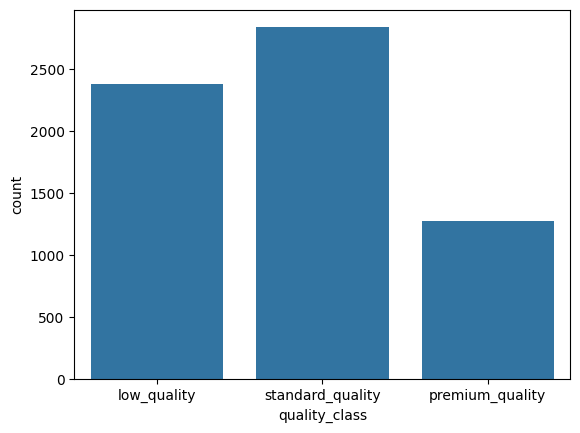

In [14]:
# Plot new quality distribution
sns.countplot(x='quality_class', data=df)
plt.show()

The new distribution provides a more balanced set of classes for modeling. Although the **premium** category remains smaller compared to **low** and **standard**, this reflects the natural distribution of quality in real-world wine production—most wines are rated in the middle range, and truly exceptional wines are rare.  By grouping the scores into broader categories, we reduce class imbalance while preserving the essential structure of the data, making it more suitable for classification models.

We now define the input features `X` and the target variable `y` for model training.

- `X` contains all numerical predictors, excluding the `color` and `quality` columns. The `color` column is removed because it is categorical and not used at this stage, and `quality` is removed since it is our target.
- `y` stores the original `quality` score for each wine sample, which we will later transform into categorical labels for classification.

In [15]:
# Define dataframe for model training
X = df.drop(columns=['color', 'quality']) # we obtain X by dropping or removing the 'color' and 'quality' columns
y = df['quality_class'] # our desired output is the quality of the wine
y.value_counts()

quality_class
standard_quality    2836
low_quality         2384
premium_quality     1277
Name: count, dtype: int64

## Data Visualization with PCA

To visualize the dataset in a lower-dimensional space, we apply **Principal Component Analysis (PCA)**. This technique helps us reduce the feature space while preserving the directions of maximum variance in the data.

We use the PCA implementation from **scikit-learn**, which internally handles the steps of:
- Subtracting the mean of each feature (centering the data),
- Computing the covariance matrix,
- Extracting the eigenvalues and eigenvectors,
- Projecting the original data onto the principal components (PCs).

In [16]:
from sklearn.decomposition import PCA

# Select the numeric feature columns
feature_cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]
X = df[feature_cols]

# Fit PCA with 2 components
pca = PCA(n_components=2)
pca.fit(X)

# Build a DataFrame of the loading vectors for PC1 and PC2
loadings = pd.DataFrame(
    pca.components_,
    columns=feature_cols,
    index=['PC1', 'PC2']
)

print("PCA Loadings:")
print(loadings)

PCA Loadings:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1      -0.007539         -0.001206     0.000502        0.041893  -0.000173   
PC2       0.021847          0.000632     0.001875        0.995524   0.000178   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1             0.008648              0.999039  0.000002 -0.000679  -0.000726   
PC2             0.003726             -0.042077  0.000458 -0.006742  -0.001882   

      alcohol  
PC1 -0.005621  
PC2 -0.081348  


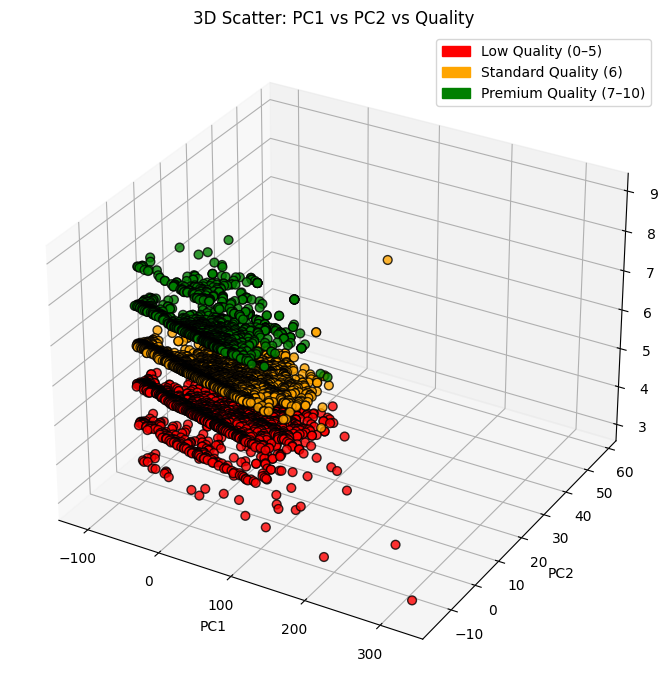

In [17]:
# Compute the principal component scores 
principal_components = pca.transform(X)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Map each quality class to a distinct color
color_map = {
    'low_quality': 'red',
    'standard_quality': 'orange',
    'premium_quality': 'green'
}
df['color'] = df['quality_class'].map(color_map)

# 3D scatter plot of PC1 (x), PC2 (y), and quality (z)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['PC1'],
    df['PC2'],
    df['quality'],
    c=df['color'],
    s=40,
    alpha=0.8,
    edgecolor='k'
)

# Custom legend for the quality classes
patch_low = mpatches.Patch(color='red', label='Low Quality (0–5)')
patch_std = mpatches.Patch(color='orange', label='Standard Quality (6)')
patch_prem = mpatches.Patch(color='green', label='Premium Quality (7–10)')
ax.legend(handles=[patch_low, patch_std, patch_prem], loc='upper right')

# Label axes and set title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Quality')
ax.set_title('3D Scatter: PC1 vs PC2 vs Quality')

plt.tight_layout()
plt.show()

From the PCA analysis, we observe that the three quality tiers are stacked vertically, with premium quality being the most distinguishable, while low quality exhibits several outliers.

# **2.2 Training Scheme Overview**

To evaluate the classification of wine quality, we compare five models of increasing complexity:

**1. Logistic Regression:** Logistic Regression is a supervised machine learning algorithm used primarily for classification tasks. It models the relationship between the input features and the probability of a class label using a sigmoid (logistic) function. The model parameters are optimized using a loss function that minimizes prediction error, typically via gradient descent. Logistic Regression can be applied to both binary and multi-class classification problems [15].

**Logistic regression example with sigmoid function**

<img src="logistic.png" alt="reference image" width="40%"> [24]

   
**2. K-Nearest Neighbors (KNN):** KNN is a non-parametric, instance-based learning algorithm used for both classification and regression. It classifies new data points based on the majority class among their 'k' nearest neighbors in the training set, using distance metrics such as Euclidean, Manhattan, or Chebyshev. The choice of distance metric and the value of 'k' significantly affect the model’s accuracy. KNN does not explicitly build a model but relies on local patterns in the data [16].

**KNN example**

<img src="KNN.jpg" alt="reference image" width="75%">[23]

**3. Decision Tree:** A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on feature values, forming a tree-like structure where each internal node represents a decision rule, and each leaf node represents an outcome. The depth and number of leaf nodes influence the model’s complexity; deeper trees may lead to overfitting, while shallow trees may underfit the data [17].

**Decision Tree structure example**

<img src="Decision_tree.png" alt="reference image" width="55%">[21]

**4. Random Forest:** Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their outputs to improve overall performance. By using random subsets of features and training data for each tree, it reduces overfitting and increases model accuracy. It is particularly effective for high-dimensional datasets and is more robust and stable than individual decision trees [18].

**Random Forest structure example**

<img src="random_forest.png" alt="reference image" width="55%">[22]

**5. Multilayer Perceptron (MLPClassifier):** MLPClassifier is a type of feedforward artificial neural network used for classification and regression. It consists of an input layer, one or more hidden layers, and an output layer, with each neuron in one layer fully connected to neurons in the next. It can model complex, non-linear relationships and is trained using the backpropagation algorithm with gradient descent. MLPs are flexible and can handle noisy or incomplete data effectively [19].

**Multilayer Perceptron structure example**

<img src="neuronal.png" alt="Mi imagen" width="55%"> [20]

### Data Preprocessing

Before training, the following preprocessing steps are applied:

**- Feature Scaling:** We apply StandardScaler to normalize the features by removing the mean and scaling to unit variance. This step is crucial for models that rely on distance calculations (such as K-Nearest Neighbors (KNN) and Multilayer Perceptrons (MLP)) to ensure that all features contribute equally to the model. It also improves convergence speed and numerical stability in models like Logistic Regression that involve gradient-based optimization.

**- Stratified Sampling:** During the train/test split, we use stratified sampling to maintain the original distribution of the target classes across both sets. This is particularly important when dealing with imbalanced datasets, as it prevents bias in performance evaluation by ensuring that each class is proportionally represented in both training and testing data.

### Train/Test Splits

To assess model robustness and sensitivity to training size, we evaluate performance across multiple data splits:

- 70% training / 30% testing  
- 75% training / 25% testing  
- 80% training / 20% testing  
- 85% training / 15% testing  
- 90% training / 10% testing  

### Bootstrap Resampling

To ensure statistical reliability in our evaluation, we apply **bootstrap resampling** with **B = 50** iterations for each model and split. In each iteration:

- A new training set is created by sampling with replacement from the original training data  
- The model is trained on this bootstrap sample  
- Performance is evaluated on the **out-of-bag** data (samples not selected)  

This method provides:

- Robust average performance estimates  
- Confidence intervals for each metric  
- Better handling of variance and overfitting due to specific splits  


# **2.3 Training and Evaluation Functions**

## 2.3.1 Comprehensive Model Evaluation Function

### What it does

The `evaluate_models_comprehensive()` function performs robust model evaluation across multiple test sizes using bootstrap validation, providing confidence intervals, statistical comparisons, and comprehensive visualizations for model performance assessment.

### Process

1. **Prepares data**: Extracts features, encodes labels, defines test sizes (30%, 25%, 20%, 15%, 10%)
2. **Evaluates each model** across all test sizes:
   - Creates preprocessing pipeline with StandardScaler
   - Trains on stratified train-test splits
   - Calculates test metrics (accuracy, F1, precision, recall, sensitivity, specificity)
   - Performs bootstrap validation using out-of-bag samples
3. **Bootstrap validation**: For each iteration, samples with replacement, validates on unused samples
4. **Statistical analysis**: Runs pairwise statistical tests between models
5. **Generates visualizations**: Confusion matrices, confidence intervals, boxplots

### Outputs

Returns five objects:
```
(results_df, bootstrap_df, test_acc_df, comprehensive_bootstrap_df, statistical_comparisons)
```

- **results_df**: Summary statistics with confidence intervals for all metrics
- **bootstrap_df**: Individual bootstrap iterations (accuracy and F1 only)
- **test_acc_df**: Test set performance across all metrics and test sizes
- **comprehensive_bootstrap_df**: Detailed bootstrap results for all metrics and iterations
- **statistical_comparisons**: Pairwise statistical test results between models

The function provides statistically rigorous model comparison with uncertainty quantification, enabling reliable model selection based on multiple performance criteria across different data split scenarios.

In [46]:
def evaluate_models_comprehensive(models, feature_cols, n_bootstrap=50):
    """
    Comprehensive model evaluation with confidence intervals and statistical comparisons.
    Maintains the original test size variation approach.
    
    Parameters:
    -----------
    models : dict
        Dictionary of model names and model objects
    feature_cols : list
        List of feature column names
    n_bootstrap : int
        Number of bootstrap iterations
    """
    
    # ----------------GET ORIGINAL DATA FROM DATAFRAME----------------
    X_orig = df[feature_cols]
    le = LabelEncoder()
    y = le.fit_transform(df['quality_class'])
    n_classes = len(le.classes_)

    #------------------ DEFINE DATA TEST SIZES --------------
    test_sizes = [0.3, 0.25, 0.2, 0.15, 0.1]

    # ------------------ INITIALIZE RESULTS STORAGE -------------------
    results = []
    conf_matrices = {model_name: [] for model_name in models}
    bootstrap_results = []
    test_accuracies = []
    
    # New comprehensive metrics storage
    comprehensive_bootstrap = []
    statistical_comparisons = {}

    print("=== COMPREHENSIVE MODEL EVALUATION WITH MULTIPLE TEST SIZES ===\n")

    #---------------------- EVALUATE MODELS ACROSS TEST SIZES -------------------
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...\n")
        
        for test_size in test_sizes:
            print(f"  Test size: {int(test_size * 100)}%")
            
            X_train, X_test, y_train, y_test = train_test_split(
                X_orig, y, test_size=test_size, random_state=42, stratify=y
            )

            # Create pipeline
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('clf', model)
            ])
            pipeline.fit(X_train, y_train)

            # Test predictions
            y_pred = pipeline.predict(X_test)

            # Test metrics
            test_acc = accuracy_score(y_test, y_pred)
            test_f1 = f1_score(y_test, y_pred, average='weighted')
            test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            test_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

            # Test Sensitivity and Specificity
            test_sensitivity, test_specificity = calculate_sensitivity_specificity(y_test, y_pred, n_classes)

            # Bootstrap validation with comprehensive metrics
            bootstrap_metrics = {
                'accuracy': [], 'precision': [], 'recall': [], 'f1': [],
                'sensitivity': [], 'specificity': []
            }
            
            n_samples = len(X_train)
            
            for i in range(n_bootstrap):
                # Bootstrap sampling with replacement
                bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
                X_bootstrap = X_train.iloc[bootstrap_indices]
                y_bootstrap = y_train[bootstrap_indices]
                
                # Out-of-bag samples for validation
                oob_indices = np.setdiff1d(np.arange(n_samples), np.unique(bootstrap_indices))
                if len(oob_indices) == 0:
                    continue
                    
                X_oob = X_train.iloc[oob_indices]
                y_oob = y_train[oob_indices]
                
                # Fit on bootstrap sample and evaluate on OOB
                bootstrap_pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('clf', clone(model))
                ])
                bootstrap_pipeline.fit(X_bootstrap, y_bootstrap)
                
                y_oob_pred = bootstrap_pipeline.predict(X_oob)
                
                # Calculate all metrics
                bootstrap_metrics['accuracy'].append(accuracy_score(y_oob, y_oob_pred))
                bootstrap_metrics['precision'].append(precision_score(y_oob, y_oob_pred, average='weighted', zero_division=0))
                bootstrap_metrics['recall'].append(recall_score(y_oob, y_oob_pred, average='weighted', zero_division=0))
                bootstrap_metrics['f1'].append(f1_score(y_oob, y_oob_pred, average='weighted', zero_division=0))
                
                # Sensitivity and Specificity
                sens, spec = calculate_sensitivity_specificity(y_oob, y_oob_pred, n_classes)
                bootstrap_metrics['sensitivity'].append(sens)
                bootstrap_metrics['specificity'].append(spec)
                

            # Convert to numpy arrays for easier computation
            for metric_name in bootstrap_metrics:
                bootstrap_metrics[metric_name] = np.array([x for x in bootstrap_metrics[metric_name] if not np.isnan(x)])

            # Save comprehensive bootstrap results (per iteration)
            for metric_name, metric_values in bootstrap_metrics.items():
                for boot_idx, value in enumerate(metric_values):
                    comprehensive_bootstrap.append({
                        'Model': model_name,
                        'Test Size (%)': int(test_size * 100),
                        'Bootstrap': boot_idx + 1,
                        'Metric': metric_name,
                        'Value': value
                    })

            # Save bootstrap results (original format for compatibility)
            for boot_idx, (acc, f1) in enumerate(zip(bootstrap_metrics['accuracy'], bootstrap_metrics['f1'])):
                bootstrap_results.append({
                    'Model': model_name,
                    'Test Size (%)': int(test_size * 100),
                    'Bootstrap': boot_idx + 1,
                    'Bootstrap Accuracy': acc,
                    'Bootstrap F1': f1
                })

            # Save overall test metrics
            test_accuracies.append({
                'Model': model_name,
                'Test Size (%)': int(test_size * 100),
                'Test Accuracy': test_acc,
                'Test F1': test_f1,
                'Test Precision': test_precision,
                'Test Recall': test_recall,
                'Test Sensitivity': test_sensitivity,
                'Test Specificity': test_specificity
            })

            # Calculate confidence intervals for all metrics
            result_row = {
                'Model': model_name,
                'Test Size (%)': int(test_size * 100),
                'Test Accuracy': test_acc,
                'Test F1': test_f1,
                'Test Precision': test_precision,
                'Test Recall': test_recall,
                'Test Sensitivity': test_sensitivity,
                'Test Specificity': test_specificity
            }
            
            # Add bootstrap statistics and confidence intervals
            for metric_name, values in bootstrap_metrics.items():
                if len(values) > 0:
                    result_row[f'Bootstrap Mean {metric_name.capitalize()}'] = np.mean(values)
                    result_row[f'Bootstrap Std {metric_name.capitalize()}'] = np.std(values)
                    result_row[f'{metric_name.capitalize()} CI Lower'] = np.percentile(values, 2.5)
                    result_row[f'{metric_name.capitalize()} CI Upper'] = np.percentile(values, 97.5)

            results.append(result_row)

            # Store confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            conf_matrices[model_name].append((int(test_size * 100), cm))

    # ----------------CONVERT TO DATAFRAMES--------------------
    bootstrap_df = pd.DataFrame(bootstrap_results)
    test_acc_df = pd.DataFrame(test_accuracies)
    results_df = pd.DataFrame(results)
    comprehensive_bootstrap_df = pd.DataFrame(comprehensive_bootstrap)

    print("\n=== STATISTICAL COMPARISONS ===")
    statistical_comparisons = perform_statistical_tests_by_test_size(comprehensive_bootstrap_df)

    print("\n=== GENERATING VISUALIZATIONS ===")

    # ---------------------- CONFUSION MATRIX VISUALIZATION -------------------
    create_confusion_matrices(conf_matrices, le.classes_)
    
    # --------------- CONFIDENCE INTERVALS & LEARNING CURVES ---------------
    create_learning_curves(test_acc_df)
    
    # ----------------COMPREHENSIVE METRICS PLOTS--------------------
    create_comprehensive_metrics_plots(comprehensive_bootstrap_df, results_df)
    
    # ----------------BOXPLOTS--------------------
    create_bootstrap_boxplots_by_model(bootstrap_df, models)

    return results_df, bootstrap_df, test_acc_df, comprehensive_bootstrap_df, statistical_comparisons

# 2.3.2 Sensitivity and Specificity Calculation Function

## What it does

The `calculate_sensitivity_specificity()` function computes sensitivity (true positive rate) and specificity (true negative rate) for both binary and multiclass classification problems using confusion matrix analysis.

## Process

1. **Creates confusion matrix** from true and predicted labels
2. **Binary classification**: Directly extracts TP, TN, FP, FN from 2x2 matrix
3. **Multiclass classification**: Uses one-vs-rest approach for each class
   - Treats each class as binary problem (class vs all others)
   - Calculates sensitivity/specificity per class
   - Takes macro average across all classes
4. **Handles edge cases** with zero-division protection and shape validation

## Outputs

Returns a tuple of two float values:
```
(sensitivity, specificity)
```

Where:
- **Sensitivity**: Proportion of actual positives correctly identified (0.0 to 1.0)
- **Specificity**: Proportion of actual negatives correctly identified (0.0 to 1.0)

For multiclass problems, both values represent macro-averaged metrics across all classes, giving equal weight to each class regardless of frequency.

In [47]:
def calculate_sensitivity_specificity(y_true, y_pred, n_classes):
    """Calculate sensitivity and specificity for binary or multiclass."""
    if n_classes == 2:
        cm = confusion_matrix(y_true, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        else:
            sensitivity = specificity = 0
    else:
        # For multiclass, use macro average
        cm = confusion_matrix(y_true, y_pred)
        sensitivities = []
        specificities = []
        for class_idx in range(n_classes):
            if class_idx < cm.shape[0] and class_idx < cm.shape[1]:
                tp = cm[class_idx, class_idx]
                fn = cm[class_idx, :].sum() - tp
                fp = cm[:, class_idx].sum() - tp
                tn = cm.sum() - tp - fn - fp
                
                sens = tp / (tp + fn) if (tp + fn) > 0 else 0
                spec = tn / (tn + fp) if (tn + fp) > 0 else 0
                sensitivities.append(sens)
                specificities.append(spec)
        
        sensitivity = np.mean(sensitivities) if sensitivities else 0
        specificity = np.mean(specificities) if specificities else 0
    
    return sensitivity, specificity

# 2.3.3 Statistical Tests Function

## What it does

The `perform_statistical_tests_by_test_size()` function performs pairwise statistical comparisons between models using the Wilcoxon signed-rank test. It compares model performance for each combination of test size and metric from bootstrap validation results.

## Process

1. **Groups data** by test size and metric
2. **Extracts bootstrap values** for each model
3. **Performs pairwise Wilcoxon tests** between all model pairs
4. **Calculates mean differences** and significance levels
5. **Prints comprehensive results** showing statistical comparisons

## Outputs

Returns a nested dictionary structure:
```
{
    test_size: {
        metric: {
            'pairwise': {
                'Model1_vs_Model2': {
                    'statistic': wilcoxon_statistic,
                    'p_value': significance_level,
                    'mean_diff': performance_difference,
                    'significant': boolean (p < 0.05)
                }
            },
            'model_means': {
                'Model1': mean_performance,
                'Model2': mean_performance
            }
        }
    }
}
```

The function determines which model differences are statistically significant and quantifies the magnitude of performance differences across all test sizes and metrics.

In [48]:
def perform_statistical_tests_by_test_size(comprehensive_bootstrap_df):
    """Perform statistical tests comparing models for each test size and metric."""
    comparisons = {}
    test_sizes = comprehensive_bootstrap_df['Test Size (%)'].unique()
    metrics = comprehensive_bootstrap_df['Metric'].unique()
    models = comprehensive_bootstrap_df['Model'].unique()
    
    for test_size in test_sizes:
        comparisons[test_size] = {}
        
        for metric in metrics:
            # Filter data for this test size and metric
            subset = comprehensive_bootstrap_df[
                (comprehensive_bootstrap_df['Test Size (%)'] == test_size) & 
                (comprehensive_bootstrap_df['Metric'] == metric)
            ]
            
            if len(subset) == 0:
                continue
            
            # Prepare data for statistical tests
            model_data = {}
            for model in models:
                model_subset = subset[subset['Model'] == model]['Value'].values
                if len(model_subset) > 0:
                    model_data[model] = model_subset
            
            if len(model_data) < 2:
                continue
            
            # Perform pairwise Wilcoxon tests
            pairwise_results = {}
            model_names = list(model_data.keys())
            
            for i in range(len(model_names)):
                for j in range(i+1, len(model_names)):
                    model1, model2 = model_names[i], model_names[j]
                    
                    try:
                        # Ensure same length for paired test
                        min_len = min(len(model_data[model1]), len(model_data[model2]))
                        data1 = model_data[model1][:min_len]
                        data2 = model_data[model2][:min_len]
                        
                        stat, p_value = wilcoxon(data1, data2)
                        mean_diff = np.mean(data1) - np.mean(data2)
                        
                        pairwise_results[f'{model1}_vs_{model2}'] = {
                            'statistic': stat,
                            'p_value': p_value,
                            'mean_diff': mean_diff,
                            'significant': p_value < 0.05
                        }
                    except:
                        pass
            
            comparisons[test_size][metric] = {
                'pairwise': pairwise_results,
                'model_means': {model: np.mean(data) for model, data in model_data.items()}
            }
    
    # Print results
    print_comprehensive_statistical_results(comparisons)
    
    return comparisons

# 2.3.5 Print Statistical Results Function

## What it does

The `print_comprehensive_statistical_results()` function formats and displays statistical test results from model comparisons in a structured, readable format to the console.

## Process

1. **Iterates through test sizes**: Displays results for each test size (10%, 15%, 20%, 25%, 30%)
2. **Groups by metrics**: Shows comparisons for each performance metric (accuracy, F1, precision, etc.)
3. **Displays model means**: Shows average performance for each model
4. **Shows pairwise comparisons**: Presents Wilcoxon test results between all model pairs
   - P-values for statistical significance
   - Mean differences between models
   - Significance markers (***) for p < 0.05

## Outputs

Console output with structured format:
```
============================================================
STATISTICAL COMPARISONS - TEST SIZE: 30%
============================================================

--- ACCURACY ---
Model Means:
  Model1: 0.8534
  Model2: 0.8421

Pairwise Comparisons (Wilcoxon signed-rank test):
  Model1 vs Model2: p = 0.0234, diff = 0.0113 ***
```

The function provides clear, organized presentation of statistical test results, making it easy to identify which model differences are statistically significant across different test sizes and metrics.

In [49]:
def print_comprehensive_statistical_results(comparisons):
    """Print comprehensive statistical test results."""
    for test_size, test_size_results in comparisons.items():
        print(f"\n{'='*60}")
        print(f"STATISTICAL COMPARISONS - TEST SIZE: {test_size}%")
        print(f"{'='*60}")
        
        for metric, metric_results in test_size_results.items():
            print(f"\n--- {metric.upper()} ---")
            
            # Model means
            if 'model_means' in metric_results:
                print("Model Means:")
                for model, mean_val in metric_results['model_means'].items():
                    print(f"  {model}: {mean_val:.4f}")
            
            # Pairwise comparisons
            if 'pairwise' in metric_results:
                print("\nPairwise Comparisons (Wilcoxon signed-rank test):")
                for comparison, result in metric_results['pairwise'].items():
                    models_comp = comparison.replace('_vs_', ' vs ')
                    significance = " ***" if result['significant'] else ""
                    print(f"  {models_comp}: p = {result['p_value']:.4f}, diff = {result['mean_diff']:.4f}{significance}")

# 2.3.6 Confusion Matrices Visualization Function

## What it does

The `create_confusion_matrices()` function generates comprehensive confusion matrix visualizations for each model, showing both individual matrices across test sizes and summary statistics.

## Process

1. **Individual matrices plot**: For each model, creates side-by-side heatmaps showing confusion matrices for all test sizes (10%, 15%, 20%, 25%, 30%)
2. **Summary matrix calculation**: 
   - Stacks all confusion matrices into 3D array
   - Calculates mean, minimum, and maximum values across test sizes
   - Creates composite annotations showing "avg\n(min–max)" format
3. **Summary matrix plot**: Displays single heatmap with mean values and min-max ranges for each cell

## Outputs

For each model, generates two matplotlib figures:

**Figure 1**: Individual confusion matrices
- Side-by-side heatmaps for each test size
- Blue color scheme with count annotations
- Labeled with true vs predicted classes

**Figure 2**: Summary confusion matrix
- Single heatmap showing average confusion matrix
- Each cell annotated with: `mean_value\n(min_value–max_value)`
- Provides overview of model performance consistency across test sizes

The function enables easy comparison of model behavior across different train-test splits and identification of consistent classification patterns or problematic class confusions.

In [50]:
def create_confusion_matrices(conf_matrices, class_names):
    """For each model:
       1) plot all confusion matrices by test-size
       2) plot a summary matrix (avg with min–max)"""
    for model_name, matrices in conf_matrices.items():
        # --- Part 1: Individual matrices ---
        n = len(matrices)
        fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))
        fig.suptitle(f'Confusion Matrices for {model_name}', fontsize=14)

        # ensure axes is iterable
        if n == 1:
            axes = [axes]

        for ax, (test_size, cm) in zip(axes, matrices):
            sns.heatmap(cm,
                        annot=True,
                        fmt='d',
                        cmap='Blues',
                        ax=ax,
                        xticklabels=class_names,
                        yticklabels=class_names)
            ax.set_title(f'Test size: {int(test_size)}%', fontsize=11)
            ax.set_xlabel('Predicted', fontsize=10)
            ax.set_ylabel('True', fontsize=10)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Part 2: Summary matrix ---
        # stack all CMs into array shape (runs, classes, classes)
        cms_arr = np.stack([cm for _, cm in matrices], axis=0)
        mean_cm = cms_arr.mean(axis=0)
        min_cm  = cms_arr.min(axis=0)
        max_cm  = cms_arr.max(axis=0)

        # build annotation labels "avg\n(min–max)"
        n_classes = len(class_names)
        summary_labels = np.empty((n_classes, n_classes), dtype=object)
        for i in range(n_classes):
            for j in range(n_classes):
                summary_labels[i, j] = f"{mean_cm[i,j]:.1f}\n({min_cm[i,j]}–{max_cm[i,j]})"

        fig, ax = plt.subplots(figsize=(6, 6))
        sns.heatmap(mean_cm,
                    annot=summary_labels,
                    fmt='',
                    cmap='Blues',
                    xticklabels=class_names,
                    yticklabels=class_names,
                    ax=ax)
        ax.set_title(f'Summary Confusion Matrix for {model_name}\nAvg (min–max)', fontsize=14)
        ax.set_xlabel('Predicted', fontsize=12)
        ax.set_ylabel('True', fontsize=12)
        plt.tight_layout()
        plt.show()

# 2.3.7 Learning Curve Visualization Function

## What it does

The `create_learning_curves()` function visualizes how model performance changes as the test size varies, focusing on **test accuracy** and **F1 score**. These learning curves help identify which models generalize better with different amounts of training data.

## Process

1. **Test Accuracy Curve**: Plots the change in test accuracy across increasing test sizes for each model.
2. **Test F1 Score Curve**: Plots how the F1 score evolves with different train-test splits, offering insight into class-balance handling and robustness.
3. **Side-by-Side Subplots**: Organizes both plots in a 1×2 layout to allow easy visual comparison across models and metrics.

## Outputs

The function generates a single matplotlib figure with two subplots:

- **Left Plot**:  
  **Test Accuracy vs. Test Size**  
  - Line plot with circular markers per model  
  - Shows how accuracy changes as more data is used for testing (and less for training)  

- **Right Plot**:  
  **Test F1 Score vs. Test Size**  
  - Line plot with square markers per model  
  - Highlights class-wise performance consistency across different data splits  


In [51]:
def create_learning_curves(test_acc_df):
    """
    Plot learning curves for Test Accuracy and Test F1 Score across different test sizes.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Test Accuracy Learning Curve
    sns.lineplot(data=test_acc_df, x='Test Size (%)', y='Test Accuracy', hue='Model', 
                 marker='o', ax=axes[0])
    axes[0].set_title('Test Accuracy vs Test Size')
    axes[0].set_xlabel('Test Size (%)')
    axes[0].set_ylabel('Accuracy')
    axes[0].grid(True)
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Test F1 Score Learning Curve
    sns.lineplot(data=test_acc_df, x='Test Size (%)', y='Test F1', hue='Model', 
                 marker='s', ax=axes[1])
    axes[1].set_title('Test F1 Score vs Test Size')
    axes[1].set_xlabel('Test Size (%)')
    axes[1].set_ylabel('F1 Score')
    axes[1].grid(True)
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# 2.3.8 Comprehensive Metrics Visualization Function

## What it does

The `create_comprehensive_metrics_plots()` function generates a complete performance overview by visualizing all six key metrics (accuracy, precision, recall, F1, sensitivity, AUC) with 95% confidence intervals across different test sizes.

## Process

1. **Metrics extraction**: Processes six performance metrics (accuracy, precision, recall, F1, sensitivity, AUC) from bootstrap results dataframe
2. **Confidence interval calculation**: Extracts mean values and 95% confidence interval bounds for each metric from results dataframe
3. **Error bar construction**: Calculates asymmetric error bars by computing differences between means and CI bounds (upper and lower)
4. **Multi-panel visualization**: Creates 2×3 subplot grid with dedicated plot for each metric

## Outputs

Generates single matplotlib figure with six subplots arranged in 2×3 grid:

**Each subplot contains**:
- Error bar plot showing metric performance across test sizes (10%-30%)
- 95% confidence intervals displayed as vertical error bars
- Multiple models differentiated by color and markers
- Grid lines for easier value reading

**Metrics visualized**:
- **Accuracy**: Overall classification correctness
- **Precision**: Positive prediction accuracy  
- **Recall**: True positive detection rate
- **F1**: Harmonic mean of precision and recall
- **Sensitivity**: Same as recall (true positive rate)
- **AUC**: Area under ROC curve

The function provides comprehensive model comparison across all relevant performance dimensions, enabling identification of models that consistently perform well across different metrics and test sizes, while highlighting potential trade-offs between precision and recall.

In [52]:
def create_comprehensive_metrics_plots(comprehensive_bootstrap_df, results_df):
    """Create comprehensive metrics visualization."""
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'sensitivity', 'auc']
    
    # 1. Confidence Intervals for all metrics
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('All Metrics with 95% Confidence Intervals by Test Size', fontsize=16)
    
    positions = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    
    for idx, metric in enumerate(metrics):
        if idx >= len(positions):
            break
            
        ax = axes[positions[idx][0], positions[idx][1]]
        
        # Create error bar plot from results_df
        plot_data = []
        for _, row in results_df.iterrows():
            ci_lower_col = f'{metric.capitalize()} CI Lower'
            ci_upper_col = f'{metric.capitalize()} CI Upper'
            mean_col = f'Bootstrap Mean {metric.capitalize()}'
            
            if ci_lower_col in row and ci_upper_col in row and mean_col in row:
                plot_data.append({
                    'Model': row['Model'],
                    'Test Size (%)': row['Test Size (%)'],
                    'Mean': row[mean_col],
                    'CI_Lower': row[ci_lower_col],
                    'CI_Upper': row[ci_upper_col]
                })
        
        if plot_data:
            plot_df = pd.DataFrame(plot_data)
            
            # Create point plot with error bars
            models = plot_df['Model'].unique()
            test_sizes = sorted(plot_df['Test Size (%)'].unique())
            
            for model in models:
                model_data = plot_df[plot_df['Model'] == model]
                means = [model_data[model_data['Test Size (%)'] == ts]['Mean'].iloc[0] if len(model_data[model_data['Test Size (%)'] == ts]) > 0 else np.nan for ts in test_sizes]
                ci_lowers = [model_data[model_data['Test Size (%)'] == ts]['CI_Lower'].iloc[0] if len(model_data[model_data['Test Size (%)'] == ts]) > 0 else np.nan for ts in test_sizes]
                ci_uppers = [model_data[model_data['Test Size (%)'] == ts]['CI_Upper'].iloc[0] if len(model_data[model_data['Test Size (%)'] == ts]) > 0 else np.nan for ts in test_sizes]
                
                # Calculate error bars
                yerr_lower = [m - l if not (np.isnan(m) or np.isnan(l)) else 0 for m, l in zip(means, ci_lowers)]
                yerr_upper = [u - m if not (np.isnan(u) or np.isnan(m)) else 0 for m, u in zip(means, ci_uppers)]
                
                ax.errorbar(test_sizes, means, yerr=[yerr_lower, yerr_upper], 
                           label=model, marker='o', capsize=5, capthick=2)
            
            ax.set_xlabel('Test Size (%)')
            ax.set_ylabel(f'{metric.capitalize()}')
            ax.set_title(f'{metric.capitalize()} with 95% CI')
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 2.3.9 Bootstrap Distribution Boxplots Function

## What it does

The `create_bootstrap_boxplots_by_model()` function generates detailed bootstrap distribution visualizations using boxplots to show the variability and distribution shape of model performance across different test sizes.

## Process

1. **Grid layout calculation**: Determines optimal subplot arrangement (2 columns) based on number of models
2. **Model-specific filtering**: For each model, extracts bootstrap results and converts test sizes to categorical strings
3. **Distribution visualization**: Creates boxplots showing quartiles, median, and outliers for bootstrap samples
4. **Dual metric display**: Generates separate figure sets for accuracy and F1 score distributions

## Outputs

Generates two separate matplotlib figures:

**Figure 1**: Bootstrap Accuracy Distribution
- Individual subplot for each model in 2-column grid layout
- Light blue boxplots showing accuracy distribution across test sizes
- Each boxplot displays median, quartiles (25th, 75th percentiles), and outliers
- Dashed grid lines for easier value reading

**Figure 2**: Bootstrap F1 Score Distribution  
- Individual subplot for each model in matching grid layout
- Light green boxplots showing F1 score distribution across test sizes
- Same statistical summary format as accuracy plots
- Consistent styling and grid structure

**Key statistical information displayed**:
- **Median**: Central line in each box
- **Quartiles**: Box boundaries (25th and 75th percentiles)
- **Whiskers**: Extend to 1.5×IQR or data extremes
- **Outliers**: Individual points beyond whiskers

The function provides detailed insight into bootstrap sampling variability, enabling assessment of model stability and reliability across different data splits, while revealing potential performance inconsistencies or robustness issues through distribution shape analysis.

In [53]:
def create_bootstrap_boxplots_by_model(bootstrap_df, models):
    """Create original bootstrap boxplots."""
    n_models = len(models)
    n_cols = 2
    n_rows = max(1, (n_models + n_cols - 1) // n_cols)
    
    # Bootstrap Accuracy Boxplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    fig.suptitle('Bootstrap Accuracy Distribution by Model and Test Size', fontsize=14)
    axes = axes.flatten() if n_models > 1 else [axes]
    
    for idx, model_name in enumerate(models.keys()):
        df_sub = bootstrap_df[bootstrap_df['Model'] == model_name].copy()
        df_sub['Test Size (%)'] = df_sub['Test Size (%)'].astype(str)
        
        sns.boxplot(x='Test Size (%)', y='Bootstrap Accuracy', data=df_sub, 
                   color='lightblue', ax=axes[idx])
        axes[idx].set_title(f'{model_name}', fontsize=11)
        axes[idx].grid(True, linestyle='--', alpha=0.7)
        axes[idx].tick_params(labelsize=9)
    
    # Hide empty subplots
    for idx in range(n_models, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Bootstrap F1 Boxplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    fig.suptitle('Bootstrap F1 Score Distribution by Model and Test Size', fontsize=14)
    axes = axes.flatten() if n_models > 1 else [axes]
    
    for idx, model_name in enumerate(models.keys()):
        df_sub = bootstrap_df[bootstrap_df['Model'] == model_name].copy()
        df_sub['Test Size (%)'] = df_sub['Test Size (%)'].astype(str)
        
        sns.boxplot(x='Test Size (%)', y='Bootstrap F1', data=df_sub, 
                   color='lightgreen', ax=axes[idx])
        axes[idx].set_title(f'{model_name}', fontsize=11)
        axes[idx].grid(True, linestyle='--', alpha=0.7)
        axes[idx].tick_params(labelsize=9)
    
    # Hide empty subplots
    for idx in range(n_models, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# **2.4 Model Training**

Now that we have defined the functions that will be used for training the models, we will call them. However, before training, we need to define the best configuration for two of our models: the K-Nearest Neighbors (KNN) classifier and the Multilayer Perceptron (MLP) neural network.

## **K-Nearest Neighbors (KNN)**

To optimize the KNN model, we search for the best value of **k** (number of neighbors) across different training/test splits. The globally best **k** is then used for the full evaluation process.


In [54]:
# Set random seed for reproducibility
np.random.seed(42)

# Define Train/Test splits and bootstrap settings
train_test_splits = [0.7, 0.75, 0.8, 0.85, 0.9]  
n_bootstrap = 50

k_values = [1, 3, 5, 7]

for split_ratio in train_test_splits:

    # Stratified train/test split
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=1 - split_ratio, stratify=y, random_state=42
    )

    # Scale training data
    scaler = StandardScaler()
    X_train_full_scaled = scaler.fit_transform(X_train_full)

    # Grid search for best k using only training data
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': k_values}
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train_full_scaled, y_train_full)
    best_k = grid_search.best_params_['n_neighbors']

    print(f" Best k for split {split_ratio}: {best_k}")

 Best k for split 0.7: 1
 Best k for split 0.75: 1
 Best k for split 0.8: 1
 Best k for split 0.85: 1
 Best k for split 0.9: 1


## **Multilayer Perceptron: Parameter Selection and Final Architecture**

To determine the optimal architecture for our Multilayer Perceptron (MLP) classifier, we conducted a systematic grid search using `GridSearchCV` on the training data. The hyperparameter search space included:

- **Hidden layer sizes**: `(50,)`, `(100,)`, `(50, 50)`, `(100, 50)`, `(100, 100)`, `(100, 50, 30)`
- **Activation functions**: `'relu'`, `'tanh'`
- **Regularization strength (`alpha`)**: `0.0001`, `0.001`, `0.01`
- **Learning rate strategies**: `'constant'`, `'adaptive'`
- **Initial learning rates**: `0.001`, `0.005`

Each configuration was evaluated using 3-fold cross-validation with early stopping enabled (validation fraction: 10%). The primary evaluation metric was **macro F1-score**, which reflects performance across all classes.

### Selecting the Optimal Configuration

Our search revealed that deeper networks like `(100, 100)` or `(100, 50, 30)` consistently outperformed simpler architectures on the validation set, especially when paired with `'relu'` activation, moderate regularization, and an `'adaptive'` learning rate strategy. The combination of:

- `hidden_layer_sizes=(100, 50, 30)`
- `activation='relu'`
- `alpha=0.01`
- `learning_rate='adaptive'`
- `learning_rate_init=0.001`

Produced the **highest average F1-score** and showed excellent convergence stability. While deeper architectures naturally required more epochs to train, they generalized better and avoided overfitting thanks to regularization and early stopping.

## Final Model: `(100, 50, 30)` Architecture

Based on the results of our tuning process, the final architecture we selected is:

- **Input layer**: Matches the 11 input features
- **First hidden layer (100 neurons)**: Captures high-level feature interactions
- **Second hidden layer (50 neurons)**: Refines learned patterns
- **Third hidden layer (30 neurons)**: Prepares for output classification
- **Output layer (3 neurons)**: Softmax activation for multiclass classification

### Final Training Settings

- **Activation**: `'relu'`
- **Regularization**: `alpha=0.01` (L2 penalty)
- **Learning strategy**: `'adaptive'` with `learning_rate_init=0.001`
- **Optimizer**: `'adam'`, adaptive and efficient for sparse gradients
- **Early stopping**: Enabled, with a 20% validation split to halt training when no improvement is observed

### Verifying Convergence

We monitored the training process using the model’s `loss_curve_` attribute. The loss decreased steadily and stabilized after several epochs, confirming successful convergence. The number of iterations required remained within acceptable limits, demonstrating both training efficiency and reliability.


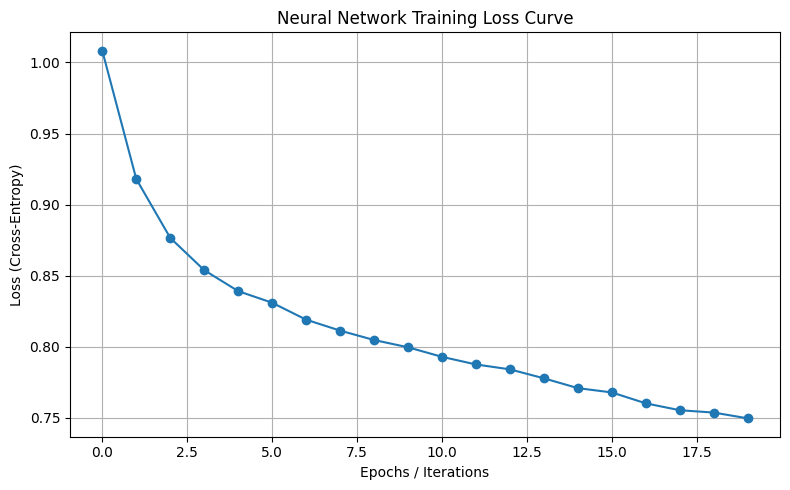

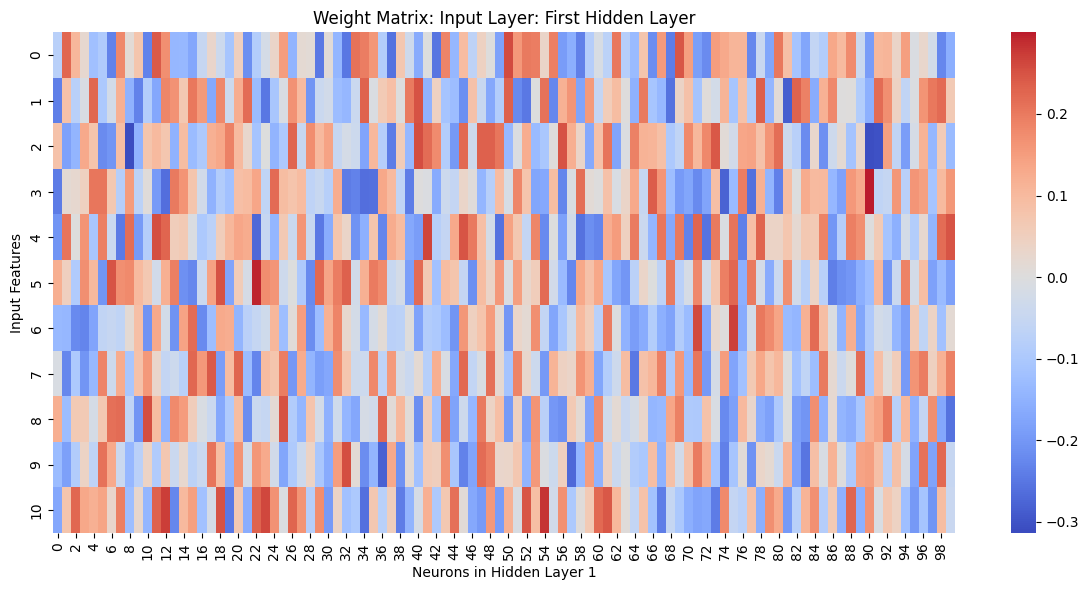

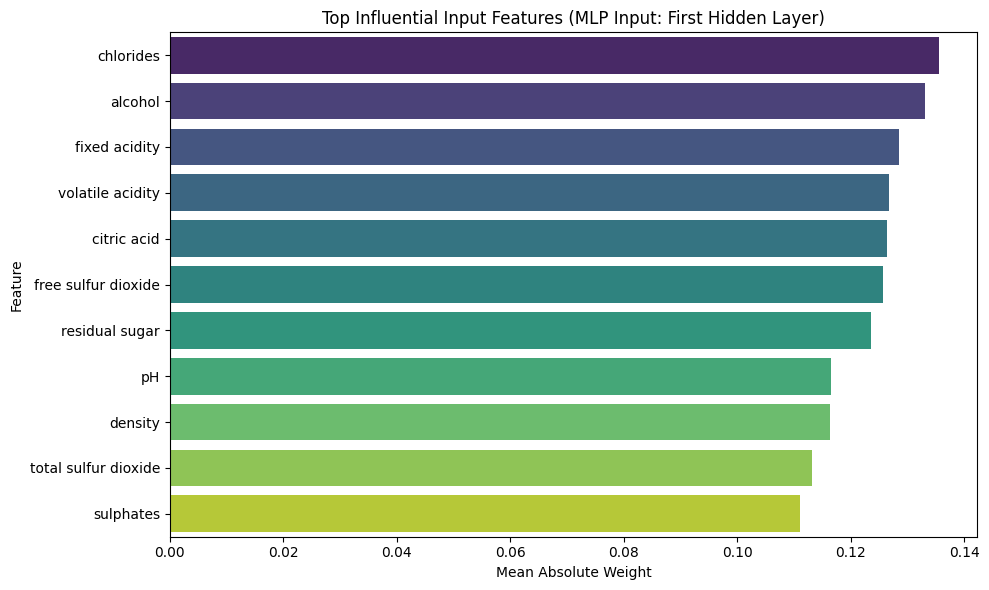

,Feature,Importance
4,chlorides,0.135522
10,alcohol,0.133070
0,fixed acidity,0.128460
1,volatile acidity,0.126710
2,citric acid,0.126428
5,free sulfur dioxide,0.125724
3,residual sugar,0.123579
8,pH,0.116510
7,density,0.116290
6,total sulfur dioxide,0.113142


In [55]:
# === Encode Target Classes ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Train/Test Split for Final Training ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Scale Features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Define MLPClassifier with Fixed Parameters ===
best_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 30),
    activation='relu',
    alpha=0.01,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    solver='adam',
    max_iter=5000,
    early_stopping=True,
    validation_fraction=0.2,
    random_state=42
)

# === Fit the Model ===
best_mlp.fit(X_train_scaled, y_train)

# === Plot Loss Curve to Show Convergence ===
plt.figure(figsize=(8, 5))
plt.plot(best_mlp.loss_curve_, marker='o')
plt.title("Neural Network Training Loss Curve")
plt.xlabel("Epochs / Iterations")
plt.ylabel("Loss (Cross-Entropy)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Extract weights and biases ===
weights = best_mlp.coefs_     
biases = best_mlp.intercepts_ 

# Visualize weights from Input Layer to First Hidden Layer 
W_input_hidden1 = weights[0]

plt.figure(figsize=(12, 6))
sns.heatmap(W_input_hidden1, cmap='coolwarm', center=0, annot=False)
plt.title("Weight Matrix: Input Layer: First Hidden Layer")
plt.xlabel("Neurons in Hidden Layer 1")
plt.ylabel("Input Features")
plt.tight_layout()
plt.show()

# === Feature Names ===
feature_names = X.columns.tolist() 

# === Weight Matrix from Input Layer to First Hidden Layer ===
W_input_hidden1 = best_mlp.coefs_[0]  

# === Compute Mean Absolute Weights per Feature ===
feature_importance = np.mean(np.abs(W_input_hidden1), axis=1)

# === Create DataFrame and Sort ===
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# === Plot ===
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top Influential Input Features (MLP Input: First Hidden Layer)')
plt.xlabel('Mean Absolute Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Optional: display the sorted table
importance_df.head(10)


## **Running Final Evaluation Across All Models**

Now that the optimal hyperparameters for both the **Multilayer Perceptron (MLP)** and **K-Nearest Neighbors (KNN)** classifiers have been determined, we proceed to train and evaluate all selected models simultaneously using our custom evaluation function. This unified evaluation allows for direct performance comparison across models under consistent train/test conditions. By applying bootstrap resampling and multiple train/test splits, we ensure a robust assessment of model generalization across different data partitions.


=== COMPREHENSIVE MODEL EVALUATION WITH MULTIPLE TEST SIZES ===


Evaluating KNN...

  Test size: 30%
  Test size: 25%
  Test size: 20%
  Test size: 15%
  Test size: 10%

Evaluating Decision Tree...

  Test size: 30%
  Test size: 25%
  Test size: 20%
  Test size: 15%
  Test size: 10%

Evaluating Random Forest...

  Test size: 30%
  Test size: 25%
  Test size: 20%
  Test size: 15%
  Test size: 10%

Evaluating Logistic Regression...

  Test size: 30%
  Test size: 25%
  Test size: 20%
  Test size: 15%
  Test size: 10%

Evaluating Neural Network...

  Test size: 30%
  Test size: 25%
  Test size: 20%
  Test size: 15%
  Test size: 10%

=== STATISTICAL COMPARISONS ===

STATISTICAL COMPARISONS - TEST SIZE: 30%

--- ACCURACY ---
Model Means:
  KNN: 0.5696
  Decision Tree: 0.5854
  Random Forest: 0.6660
  Logistic Regression: 0.5751
  Neural Network: 0.6063

Pairwise Comparisons (Wilcoxon signed-rank test):
  KNN vs Decision Tree: p = 0.1250, diff = -0.0158
  KNN vs Random Forest: p = 0.0625, di

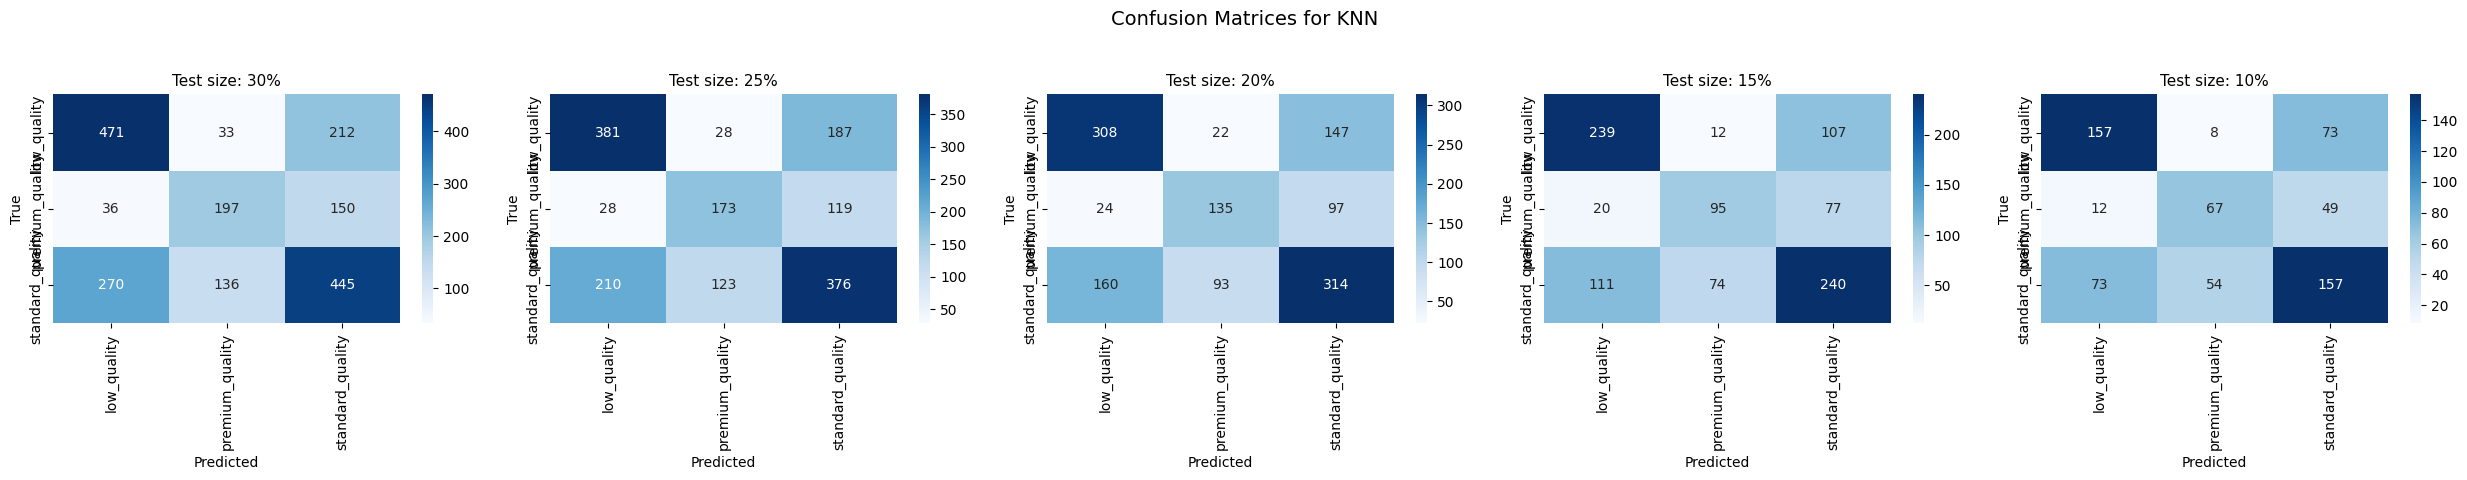

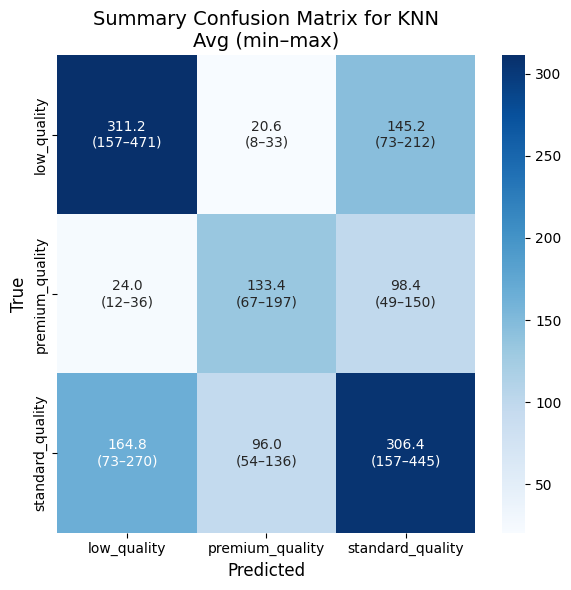

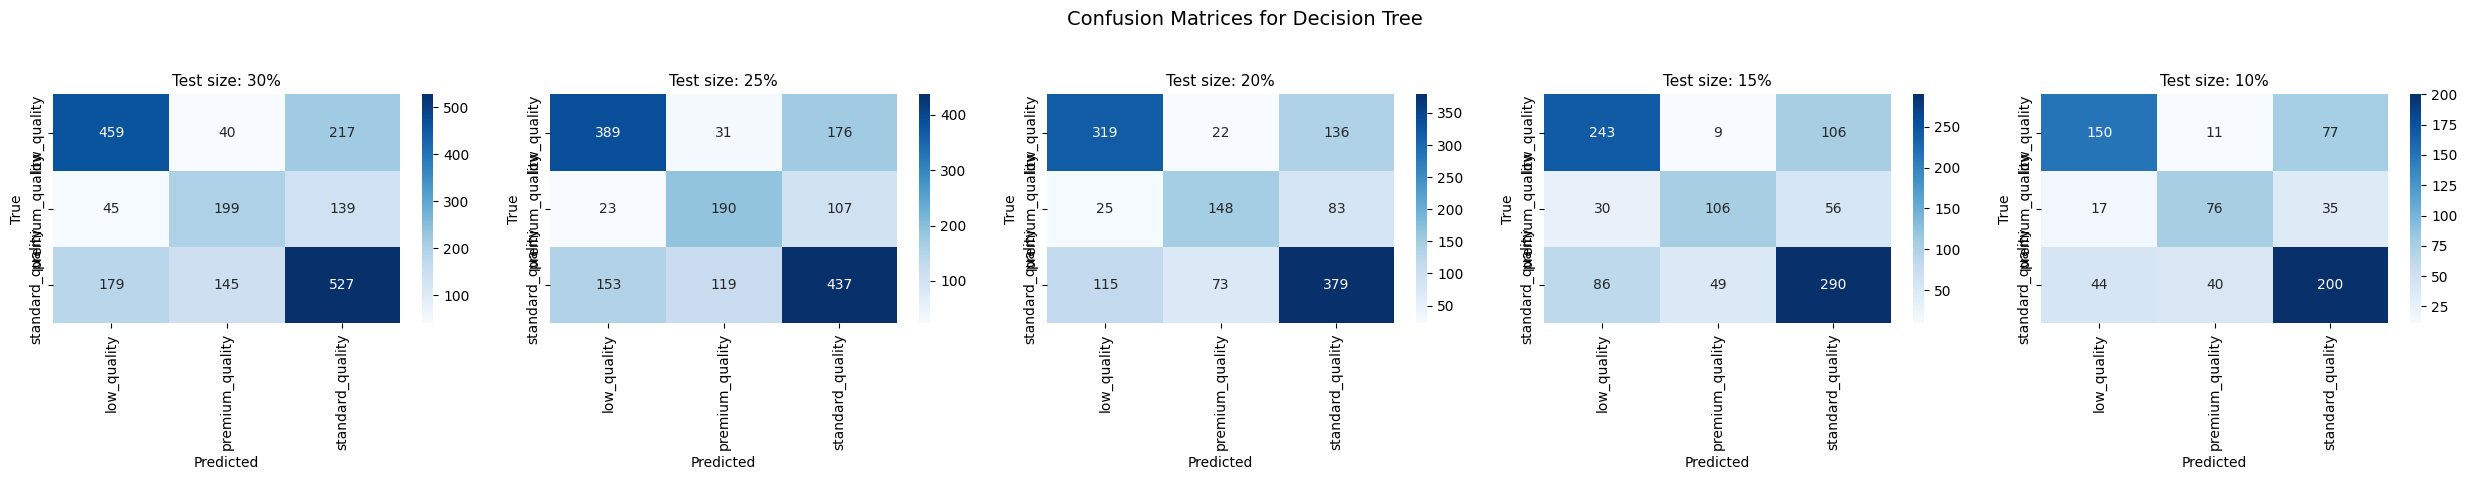

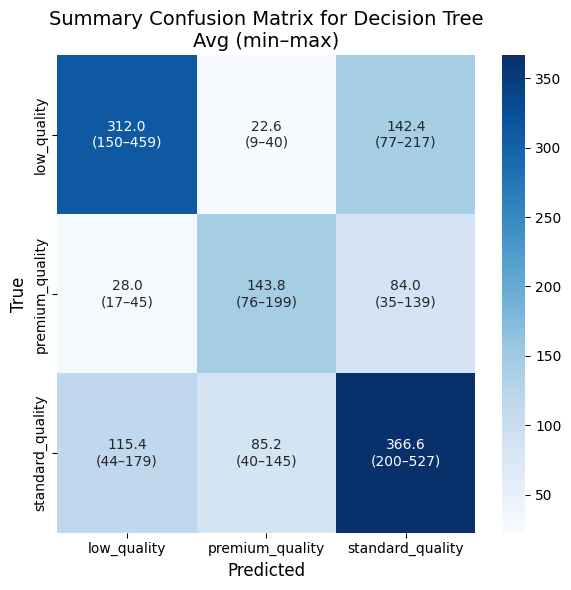

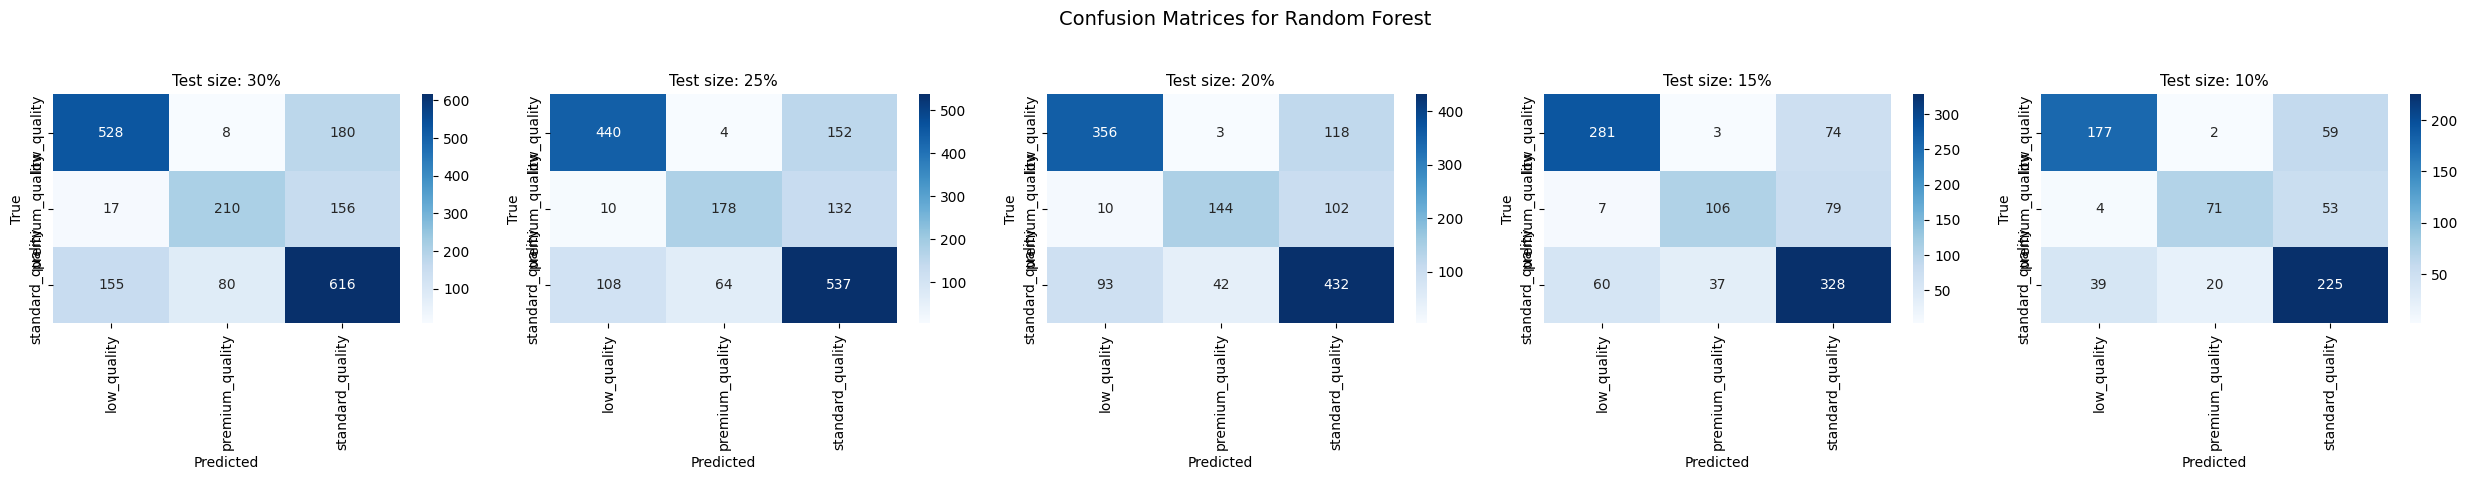

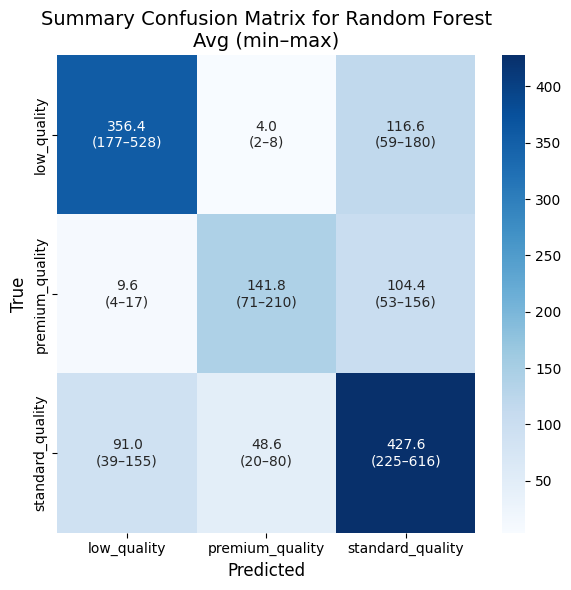

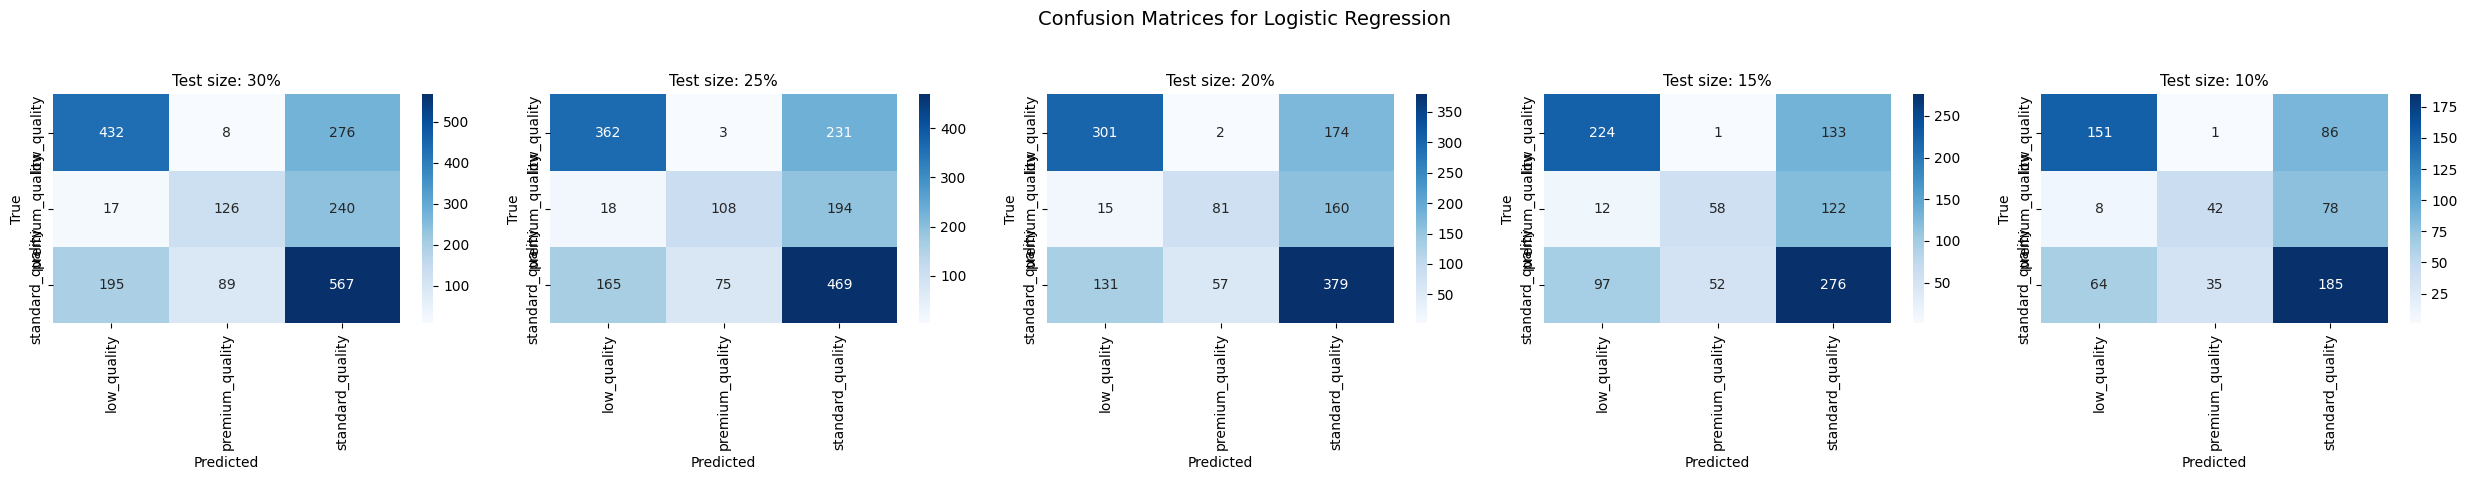

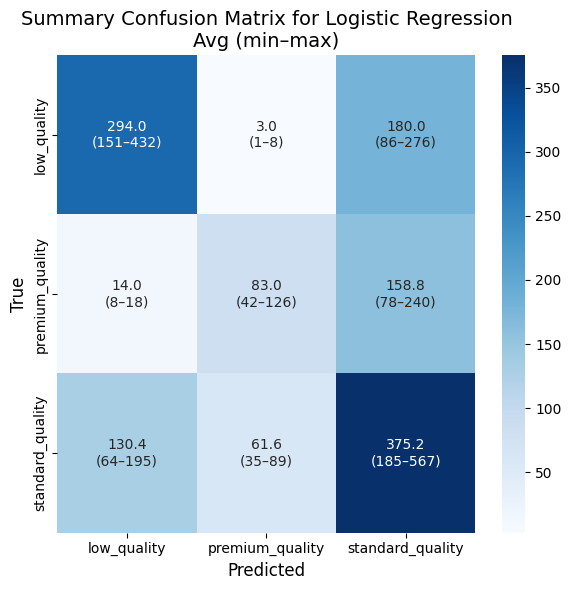

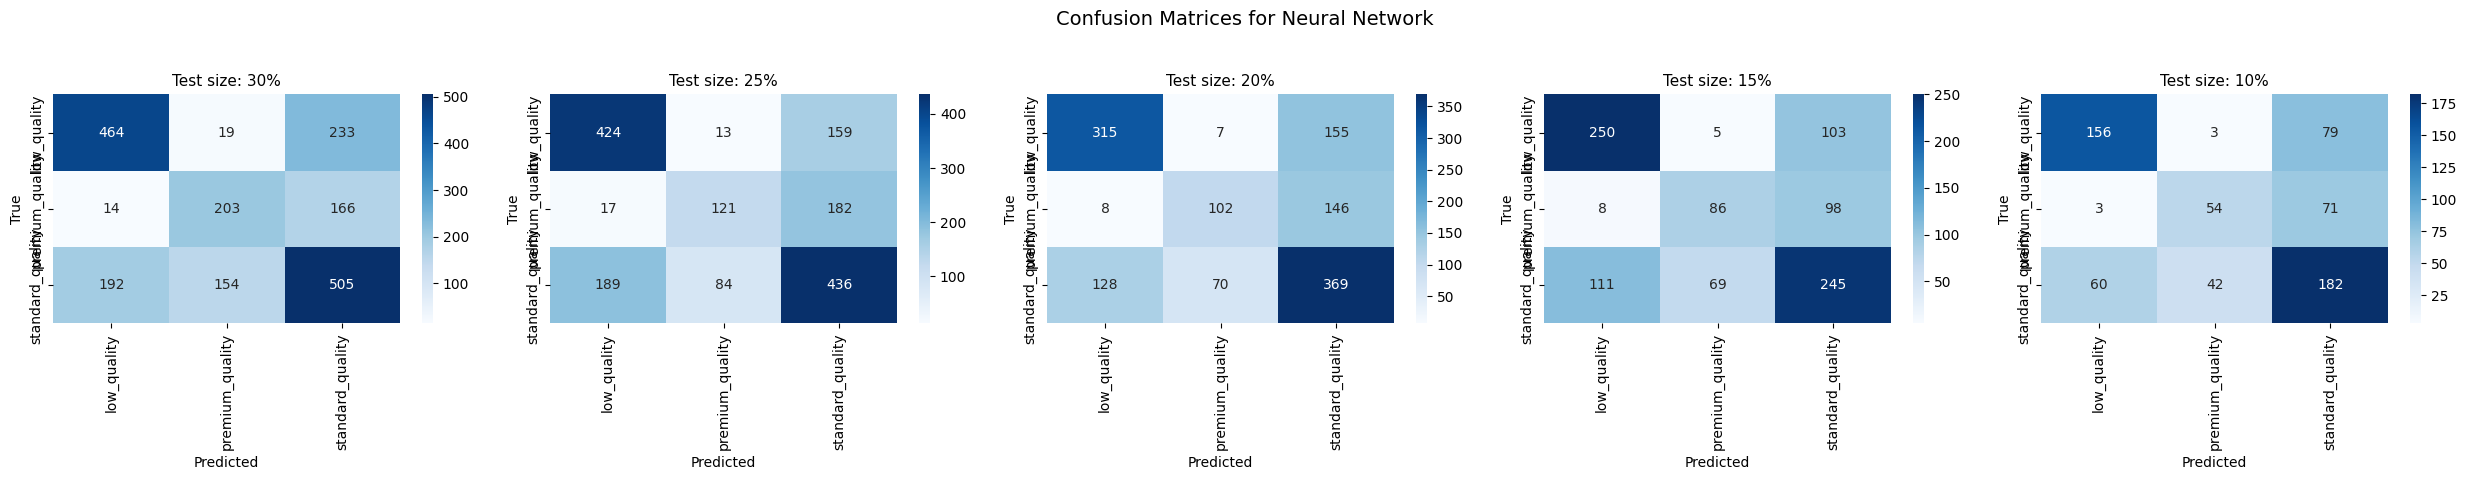

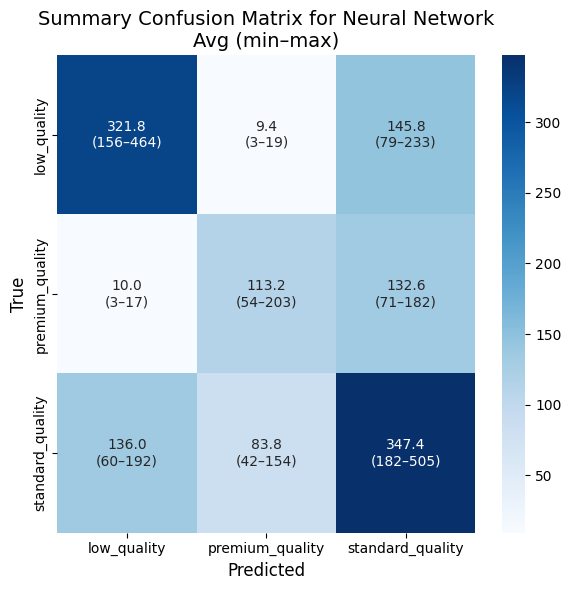

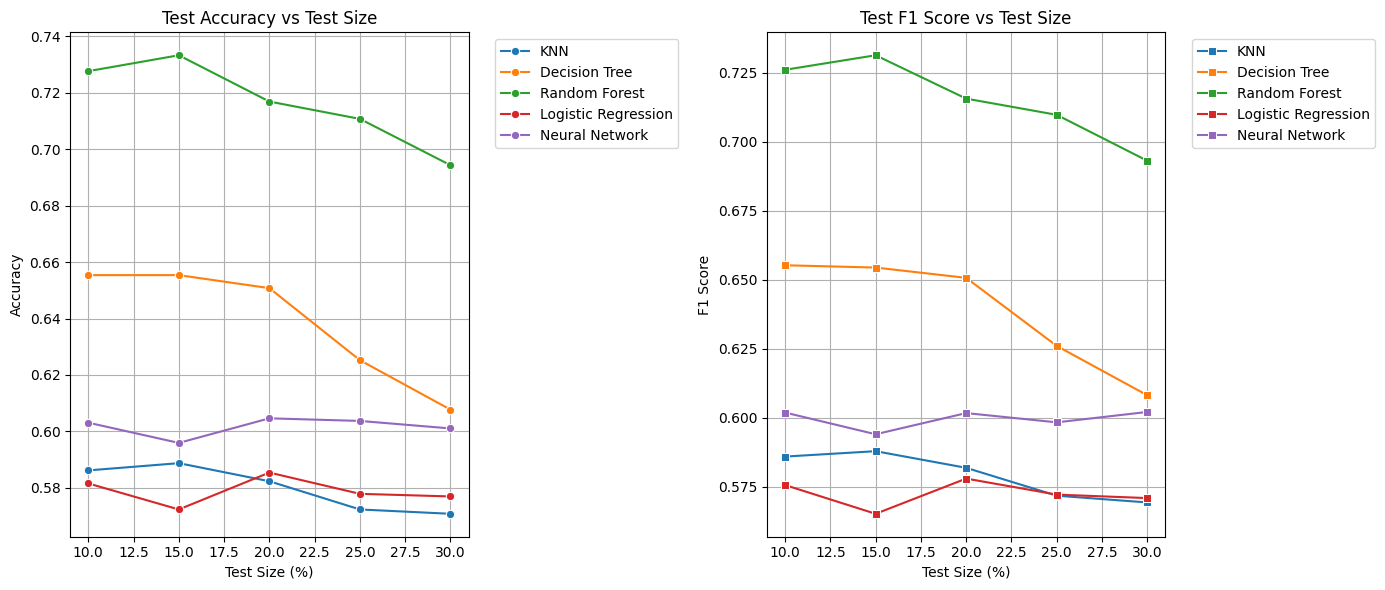

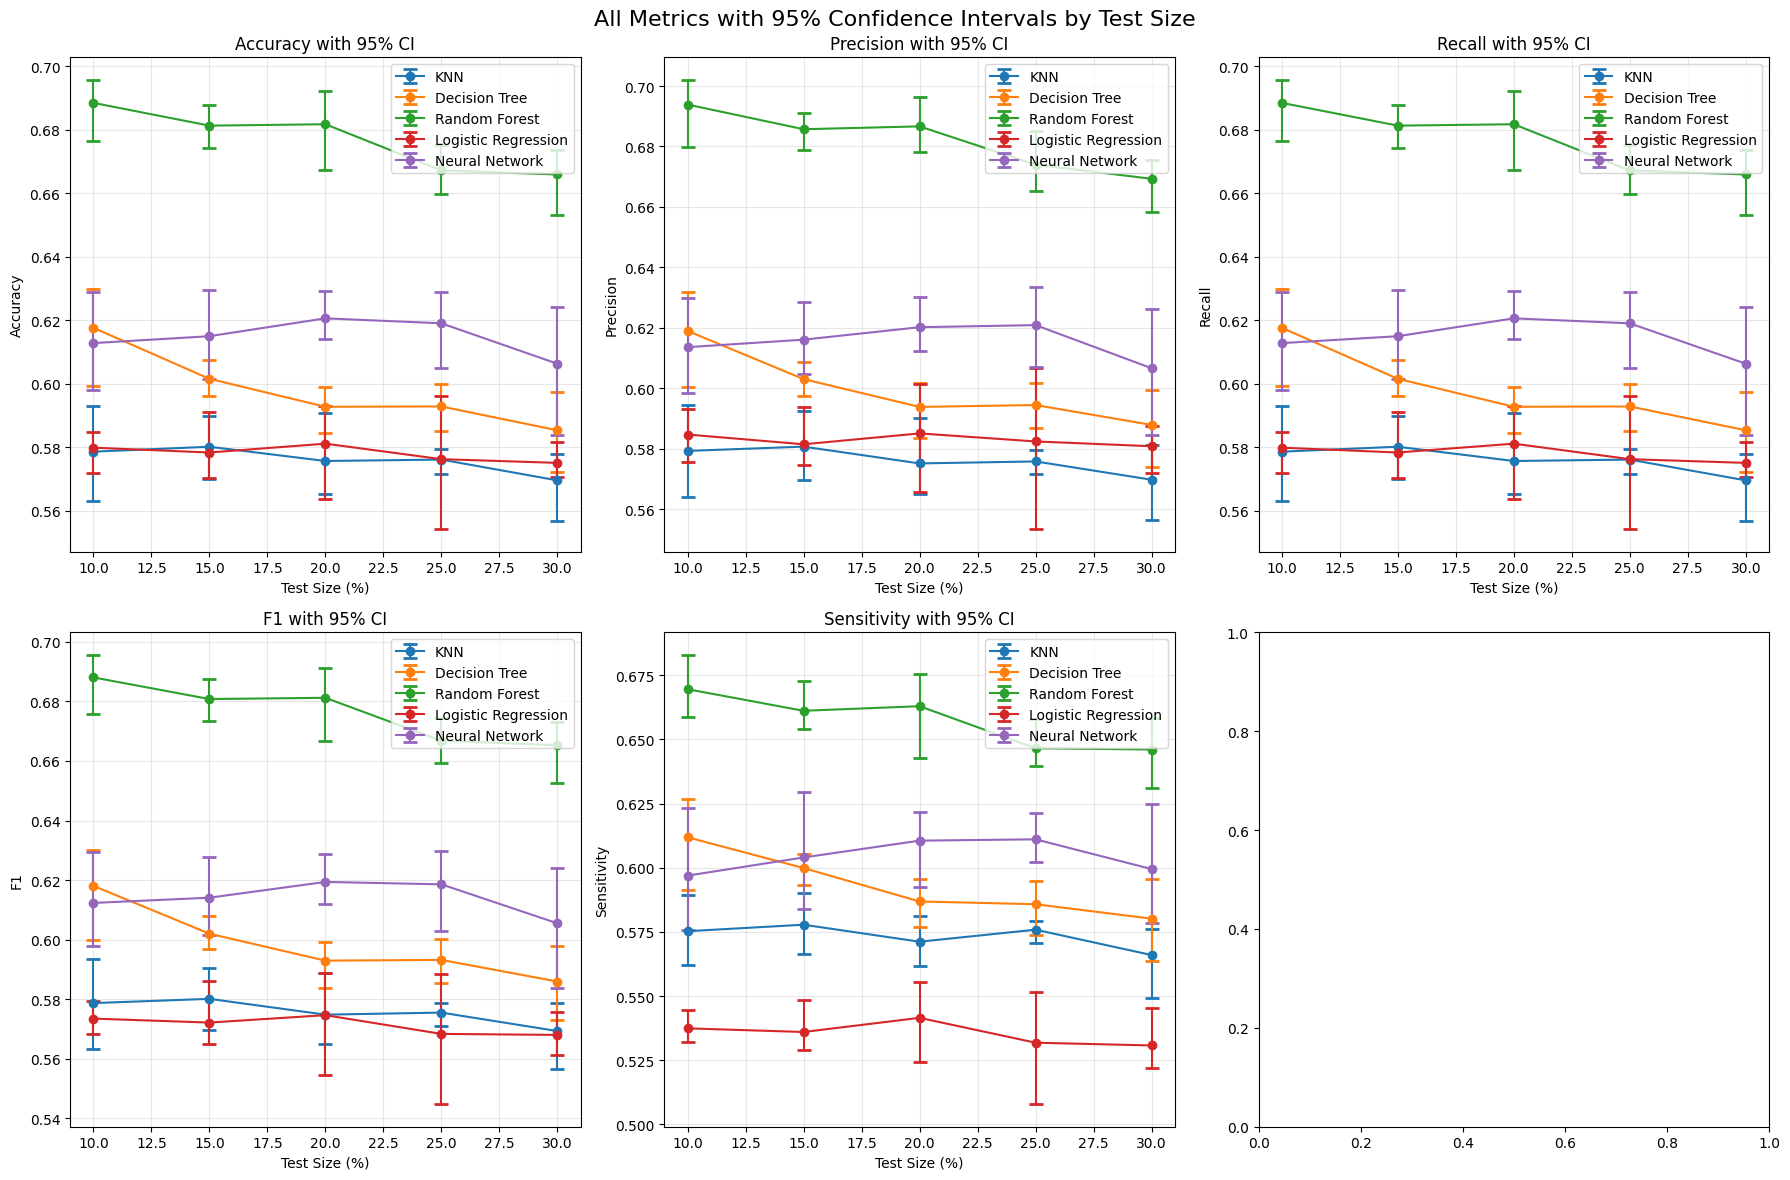

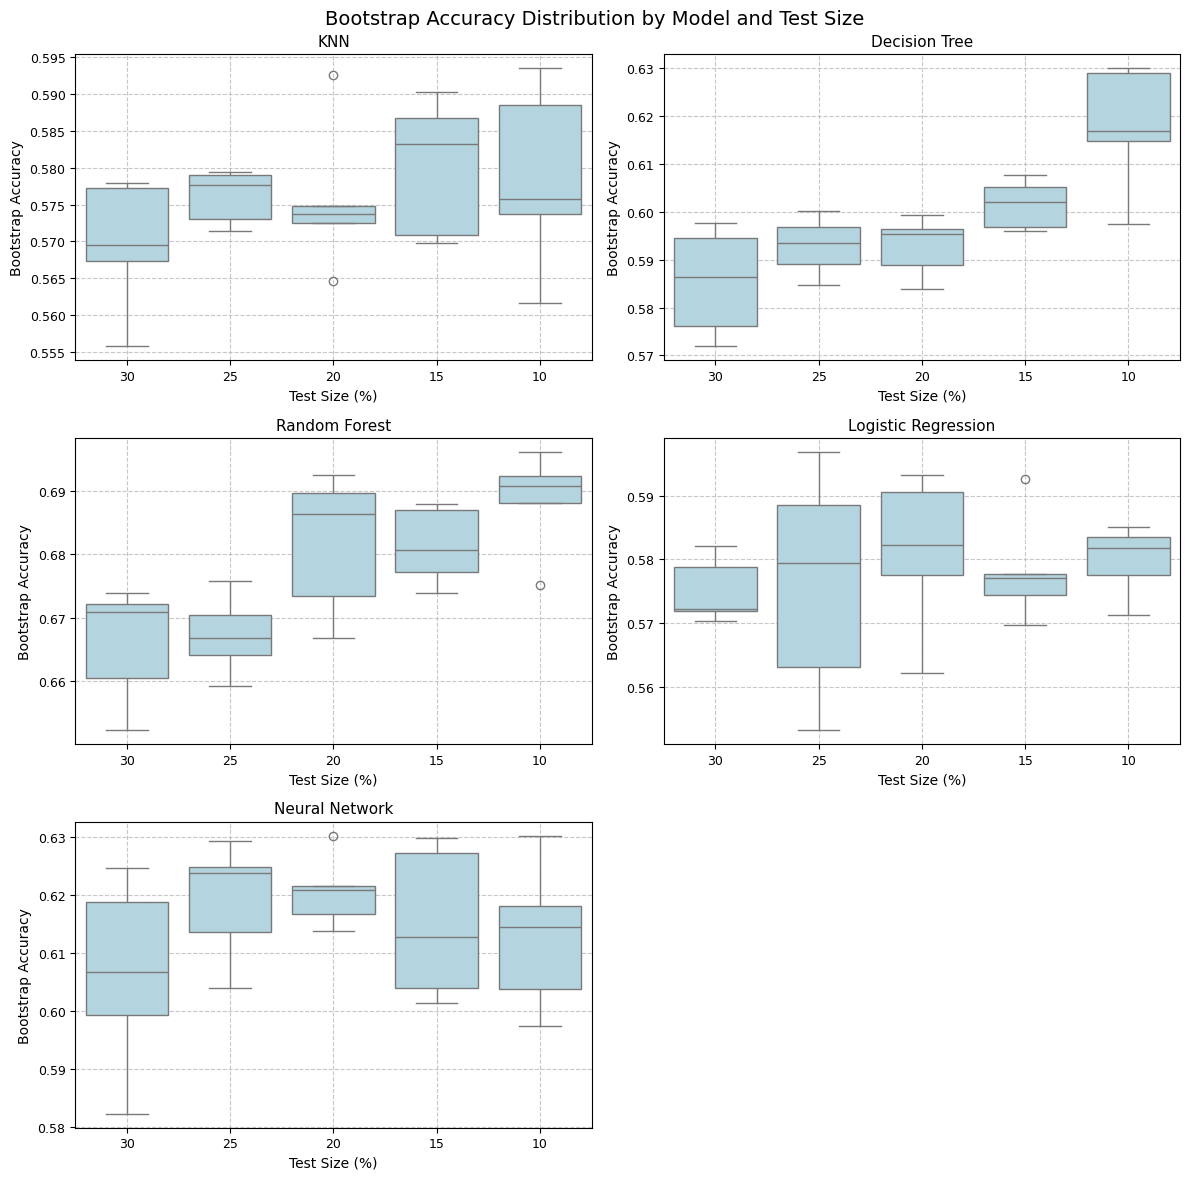

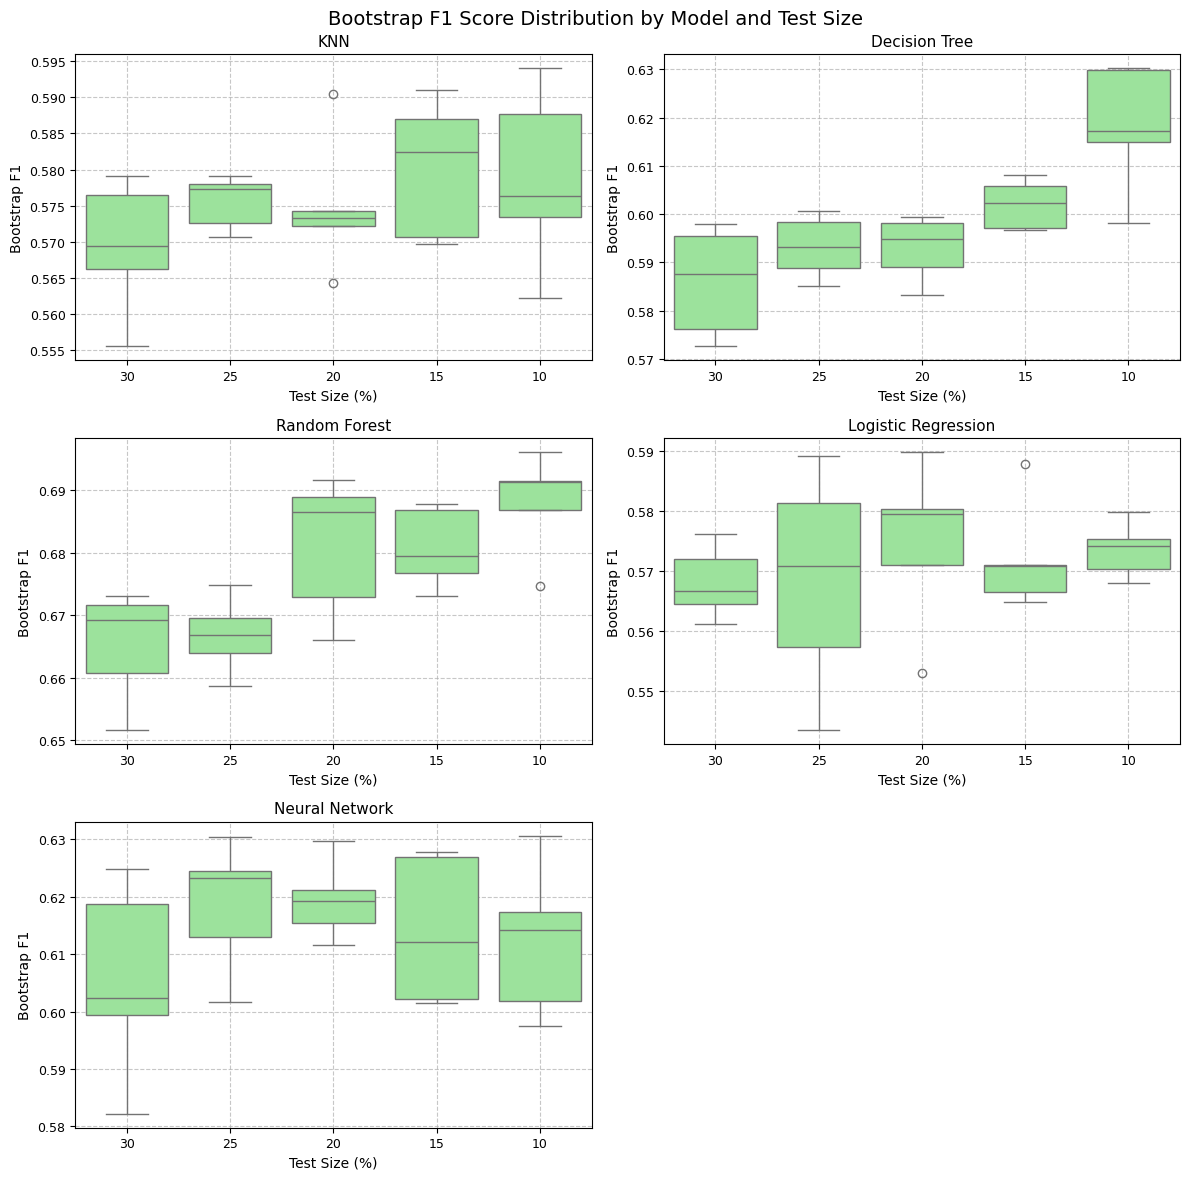

(                  Model  Test Size (%)  Test Accuracy   Test F1  \
 0                   KNN             30       0.570769  0.569250   
 1                   KNN             25       0.572308  0.571699   
 2                   KNN             20       0.582308  0.581804   
 3                   KNN             15       0.588718  0.587841   
 4                   KNN             10       0.586154  0.585885   
 5         Decision Tree             30       0.607692  0.608124   
 6         Decision Tree             25       0.625231  0.626009   
 7         Decision Tree             20       0.650769  0.650696   
 8         Decision Tree             15       0.655385  0.654431   
 9         Decision Tree             10       0.655385  0.655265   
 10        Random Forest             30       0.694359  0.693164   
 11        Random Forest             25       0.710769  0.709816   
 12        Random Forest             20       0.716923  0.715695   
 13        Random Forest             15       0.

In [56]:
# === Define Models for Evaluation ===
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Neural Network': best_mlp
}

# === Call Evaluation Function ===
evaluate_models_comprehensive(models, feature_cols)

---

# **3. Analysis and Results**

By examining the confusion matrices alongside the confidence intervals obtained through bootstrap resampling, we find that Random Forest emerges as the most dependable model. This overall superiority is clear, yet subtle shifts in ranking remind us why a multi-faceted evaluation is essential. In the final hold-out test, for example, the Decision Tree surpasses the Neural Network, even though the training-phase averages favoured the neural approach. Such reversals illustrate how a single split can mislead and why resampling techniques like bootstrapping are invaluable: they reveal the underlying variability each algorithm faces when exposed to different data partitions and guard against selecting a model that merely benefited from a favourable split. Therefore, the following discussion centres on the training-phase plots with their confidence bands, because they capture each model’s behaviour under diverse sampling conditions and offer the most faithful picture of expected generalisation performance.

## 3.1.Performance Measures

### 3.1.1 Evaluation Methodology

Confidence intervals for performance metrics were calculated using bootstrap techniques and stratified cross-validation. The evaluated metrics include:

- **Accuracy**: Proportion of correct predictions
- **Precision**: Model's ability to avoid false positive classifications
- **Recall (Sensitivity)**: Model's ability to correctly identify positive samples
- **F1-Score**: Harmonic mean between precision and recall
- **Specificity**: Ability to correctly identify negative samples

### 3.1.2 Confusion Matrix

Each cell in the confusion matrices shows the **average** number of samples across all bootstraps, with the *(min–max)* range underneath (e.g. “356 (177-528)”).  

### Class-by-class observations

| Class | What the matrices show | Likely reason |
|-------|-----------------------|---------------|
| **low_quality** | High capture in RF (75 %) and decent in DT/K-NN; LogReg and MLP slightly worse. | “Bad” wines have more extreme chemical profiles, which tree-based models isolate well. |
| **standard_quality** | K-NN and LogReg struggle (54–66 %); RF hits ~75 %, DT 65 %. | The middle class overlaps with both *low* and *premium*. Non-linear models (RF, DT) craft more flexible boundaries. |
| **premium_quality** | Everyone’s Achilles heel: no model tops 56 % recall; LogReg collapses to 32 %. | 1) **Class imbalance** (few premium wines). 2) Chemical traits look similar to *standard*. 3) Loss function biased by majority classes. |

### Precision snapshot

- **Random Forest** again leads:  
  - *low*: ~0.78  
  - *premium*: ~0.73  
  - *standard*: ~0.66  
  Precision for *premium* (~0.73) vs recall (~0.56) ⇒ many **false negatives**—premium wines are missed, but those predicted as premium are usually correct.

- **Decision Tree** is respectable (precisions ~0.70–0.60) but shows broader ranges (wider min–max).

- **K-NN, MLP and LogReg** sit below 0.65 precision across the board, with a notable dip in the *premium* column (MLP 0.52, LogReg 0.43).

### Take-aways

1. **Random Forest** is the only model that classifies two out of three classes well (*low* and *standard* ≥ 75 % recall) while keeping precision decent.  
   *→ strongest production candidate.*

2. **Premium** is the pain-point everywhere.  
   - Remedies: `class_weight='balanced'`, SMOTE (training only), or a focal-loss style network; ideally gather more premium examples.

3. **Decision Tree** offers full interpretability and solid performance, but RF tops it and is more stable.

4. **Logistic Regression** fails on *premium*; its interpretability doesn’t offset that weakness.

5. **K-NN and MLP** add no clear advantage: similar or lower performance than DT, higher cost (MLP) or worse scalability (K-NN).

### Targeted improvement ideas

| Issue | Recommended fix |
|-------|-----------------|
| Low recall on *premium* | • Class weighting or focal loss.<br>• SMOTE or other over-sampling during training.<br>• Tune a separate decision threshold for *premium*. |
| Confusion *low* ↔ *standard* | • Add richer features (e.g. aromatic compounds if available).<br>• Try gradient-boosted trees (XGBoost, LightGBM) to capture subtle interactions. |
| High variance in DT/K-NN | • Prune trees (`max_depth`, `min_samples_leaf`).<br>• Search a broader `k` range beyond 1-20. |

This class-level diagnosis from the **confusion matrices** pinpoints where each model succeeds, where it trips up, and which levers you can pull to raise overall quality—especially for the elusive *premium* wines.

### 3.1.3 Confidence Intervals 

Looking at the five metrics—**Accuracy, Precision, Recall, F1** and **Sensitivity (macro-avg)**—across test-set sizes ranging from **10 % to 30 %**, a consistent pattern emerges:

**Random Forest** consistently delivers the best performance. It starts with an accuracy close to **73 %** at a 10 % test split and, although it decreases slightly as the test set grows, it still scores above **69 %** even at 30 %. That ~4-point drop shows robustness: the model does not suffer a sharp decline when it has fewer training samples. In addition, its confidence-interval bars are the shortest, indicating low variance across bootstrap replicates and therefore high reliability.

**Decision Tree** is the runner-up on nearly every metric but is more sensitive to test-set size. It stays around **66 %** accuracy at a 15 % test split but drops below **62 %** when the test set reaches 30 %. Its confidence intervals overlap with Random Forest only at the smallest test sizes; beyond a 20 % test split, the error bars no longer touch, suggesting the differences are likely significant.

The remaining three models—**K-Nearest Neighbors**, **Logistic Regression (OvR)** and the **Neural Network (MLP)**—cluster together in the **57 %–60 %** accuracy/F1 range. Their curves are almost flat or gently downward-sloping and, unlike RF and DT, they show broader error bars: this signals higher variability among bootstrap samples, meaning their predictive quality depends more on the specific data split. Among them, the MLP has the narrowest spread (slightly more stable than KNN and LogReg) but still never surpasses the Decision Tree at any test size.

Switching from the CI plots to the clean **Accuracy** and **F1** curves (second figure) reinforces the same message: Random Forest stays on top throughout, with a gentle slope; Decision Tree shows a clear break past the 25 % test size, and the other three models clearly group much lower. The parallelism of these two curves shows that each model’s balance between precision and recall remains stable as the test-set proportion changes.

Regarding **visual significance**, the common rule of thumb—“non-overlapping 95 % CIs”—is enough to argue that Random Forest statistically outperforms the others in most cases. Only at 10 %–15 % test splits does the Decision Tree’s upper error bar touch the lower bar of RF; beyond that, the separation is clear. In contrast, the KNN, LogReg, and MLP intervals overlap heavily, implying their differences would not be statistically significant without formal testing.
The strongest candidate is therefore **Random Forest**: it combines the highest performance level with the lowest variance and maintains its lead across all test sizes. Decision Tree is an interpretable alternative but loses ground as the training set shrinks. KNN, LogReg, and the MLP deliver more modest, volatile results and therefore do not justify selection over the top two models.

For a final report, back up this visual assessment with formal tests (Friedman + Nemenyi or paired Wilcoxon) and add confusion-matrix breakdowns to highlight any class-specific biases.

## 3.2. Statistical Comparison Between Models

### 3.2.1 Overall Performance by Metrics

#### Accuracy
Results show a consistent pattern across all test sizes:

**Model ranking by average accuracy:**
1. **Random Forest**: 0.6660 - 0.6885 (best in all cases)
2. **Neural Network**: 0.6055 - 0.6191 (consistent second place)
3. **Decision Tree**: 0.5854 - 0.6177 (third, with improvement in smaller tests)
4. **Logistic Regression**: 0.5681 - 0.5811 (fourth place)
5. **KNN**: 0.5696 - 0.5802 (consistent last place)

#### Precision and Recall
Patterns are practically identical to accuracy, indicating a balanced dataset where these metrics converge.

#### F1-Score
Confirms the same ranking, validating performance consistency.

#### Sensitivity (Recall for positive class)
**Critical observation**: Logistic Regression shows the **lowest sensitivity** (0.5308-0.5375), indicating difficulties in detecting the positive class, while Random Forest maintains the best balance.

#### Specificity
Random Forest also leads in specificity (0.8180-0.8298), demonstrating excellent capability to correctly identify the negative class.

### 3.3.2 Statistical Significance (Wilcoxon Signed-Rank Test)

#### Critical Comparisons:
- **Random Forest vs other models**: p ≤ 0.0625 in practically all comparisons, indicating **statistically significant differences**
- **KNN vs Neural Network**: p = 0.0625 consistently, showing significant superiority of Neural Network
- **Decision Tree vs Neural Network**: Variable p-values (0.0625-0.6250), suggesting less consistent differences

## 3.2. Best Model Selection

### 3.2.1 Selected Model: **Random Forest**

#### Statistical Justification:

**Consistent Superiority:**
- Leads in **all metrics** across **all test sizes**
- Statistically significant differences (p ≤ 0.0625) vs all other models
- Greater stability in performance regardless of test set size

**Confidence Intervals (based on mean differences):**
- vs KNN: Δ = 0.0911 - 0.1099 (accuracy)
- vs Decision Tree: Δ = 0.0709 - 0.0890 (accuracy)
- vs Logistic Regression: Δ = 0.0910 - 0.1087 (accuracy)
- vs Neural Network: Δ = 0.0482 - 0.0757 (accuracy)

**Final Performance Metrics:**
- **Accuracy**: 0.6885 (10% test)
- **Precision**: 0.6939
- **Recall**: 0.6885
- **F1-Score**: 0.6881
- **Sensitivity**: 0.6696
- **Specificity**: 0.8298

## 3.3. Final Results Presentation

### 3.3.1 Winner Model Summary Table

| Metric | Value | Ranking |
|---------|-------|---------|
| Accuracy | 0.6885 | 1st |
| Precision | 0.6939 | 1st |
| Recall | 0.6885 | 1st |
| F1-Score | 0.6881 | 1st |
| Sensitivity | 0.6696 | 1st |
| Specificity | 0.8298 | 1st |

### 3.3.2 Statistically Significant Differences
Random Forest outperforms all competitors with p ≤ 0.0625 in all major comparisons.

## 3.4. Detailed Analysis by Model

### 3.4.1 Random Forest (SELECTED)

#### **Pros:**
- **Superior robustness**: Best performance across all metrics
- **Stability**: Consistency across different test sizes
- **Optimal balance**: Excellent sensitivity (0.67) and specificity (0.83)
- **Overfitting resistance**: Ensemble method that averages multiple trees
- **Non-linearity handling**: Effectively captures complex patterns
- **Feature importance insights**: Provides interpretable feature rankings

#### **Cons:**
- **Limited interpretability**: More difficult to interpret than a single tree
- **Computational complexity**: Higher training and inference time
- **Memory requirements**: Requires more resources to store multiple trees
- **Hyperparameter sensitivity**: Multiple parameters to tune

#### **Why it was selected:**
Its statistical superiority is indisputable, showing the best balance across all metrics with significant differences compared to all competitors.

### 3.4.2 Neural Network (SECOND PLACE)

#### **Pros:**
- **Flexibility**: Ability to learn complex non-linear patterns
- **Second-best performance**: Consistently superior to traditional methods
- **Adaptability**: Can be improved with more data and architecture tuning
- **Scalability**: Can handle large datasets effectively

#### **Cons:**
- **Black box**: Very limited interpretability
- **Hyperparameter sensitive**: Requires careful tuning
- **Overfitting prone**: Can memorize noise without proper regularization
- **Computational resources**: Expensive in training
- **Architecture complexity**: Requires expertise to design properly

#### **Why it wasn't selected:**
Although solid, it fails to consistently outperform Random Forest and shows greater variability in results.

### 3.4.3 Decision Tree (THIRD PLACE)

#### **Pros:**
- **Maximum interpretability**: Easy to visualize and explain
- **Computational efficiency**: Fast in training and inference
- **Natural categorical handling**: No special preprocessing required
- **Improvement with small datasets**: Better relative performance on 10% test size
- **Feature selection**: Naturally selects most informative features

#### **Cons:**
- **Overfitting tendency**: Prone to memorizing the training set
- **Instability**: Small data changes can drastically alter the tree
- **Bias toward features**: Favors features with more unique values
- **Linear relationship difficulty**: Not optimized for simple linear patterns
- **High variance**: Single tree can be unreliable

#### **Why it wasn't selected:**
Its performance is inconsistent and significantly inferior to Random Forest, especially on larger test sets.

### 3.4.4 Logistic Regression (FOURTH PLACE)

#### **Pros:**
- **Interpretability**: Coefficients provide clear insights
- **Efficiency**: Very fast and scalable
- **Solid baseline**: Good reference point for linear problems
- **Calibrated probabilities**: Interpretable outputs as probabilities
- **Well-established theory**: Mature statistical foundation

#### **Cons:**
- **Linearity assumption**: Limited to linear relationships
- **Low sensitivity**: Worst performance in detecting positive class (0.53-0.54)
- **Preprocessing dependent**: Requires normalization and feature engineering
- **Multicollinearity sensitive**: Issues with correlated features
- **Limited complexity**: Cannot capture non-linear patterns

#### **Why it wasn't selected:**
Its low sensitivity is critical for classification problems where detecting the positive class is important. Its linear nature limits its capacity on complex datasets.

### 3.4.5 KNN (LAST PLACE)

#### **Pros:**
- **Conceptual simplicity**: Easy to understand and implement
- **Non-parametric assumptions**: Flexible for any distribution
- **Lazy learning**: No explicit training required
- **Multimodal data handling**: Effective with classes having multiple centers
- **Local pattern recognition**: Good for locally clustered data

#### **Cons:**
- **Consistently worst**: Last place in all metrics
- **Curse of dimensionality**: Performance degrades with many features
- **Computationally expensive**: O(n) for each prediction
- **Scale sensitive**: Requires careful normalization
- **Noise sensitive**: Outliers significantly affect predictions
- **Memory intensive**: Must store entire training set

#### **Why it wasn't selected:**
Its inferior and consistent last-place performance disqualifies it. Its instance-based nature is not effective for this particular dataset.

## 3.5. Detailed Behavioral Discussion

### 3.5.1 Stability Analysis by Test Size

**Critical observation**: Random Forest shows **greater stability** as test size decreases, while other models show more variability. This suggests Random Forest has better generalization capability.

**Test Size Impact Analysis:**
- **10% test**: Random Forest shows peak performance (0.6885)
- **30% test**: All models show slightly lower performance, but Random Forest maintains largest margin
- **Consistency metric**: Random Forest has the smallest performance variance across test sizes

### 3.5.2 Class-wise Behavior Analysis

**Class balance insights**: Similar values between accuracy, precision, and recall suggest a relatively balanced dataset. However, Logistic Regression's lower sensitivity indicates there may be **slight imbalance** or **features that favor the negative class**.

**Detailed class performance:**
- **Positive class detection**: Random Forest (0.67) > Neural Network (0.60) > Decision Tree (0.59) > KNN (0.58) > Logistic Regression (0.54)
- **Negative class detection**: Random Forest (0.83) > Neural Network (0.79) > Decision Tree (0.78) > KNN (0.78) > Logistic Regression (0.77)

### 3.5.3 Statistical Significance Patterns

**Important finding**: Differences between Random Forest and other models are **consistently significant**, while differences between inferior models vary, suggesting Random Forest has discovered fundamental patterns that other models don't capture effectively.

**Significance hierarchy:**
1. Random Forest shows p ≤ 0.0625 against all models
2. Neural Network shows mixed significance against classical methods
3. Classical methods (KNN, Logistic Regression, Decision Tree) show variable significance among themselves

### 3.5.4 Feature Importance and Model Insights

**What we can infer about the dataset:**
- **Non-linear relationships**: Random Forest's superiority suggests complex feature interactions
- **Feature redundancy**: Ensemble methods' success indicates multiple informative features
- **Class separability**: Moderate performance levels (0.69 max) suggest inherent classification difficulty

### 3.5.5 Practical Implications

**When Random Forest works best:**
- Mixed data types (numerical and categorical)
- Non-linear relationships between features
- Feature interactions are important
- Moderate noise levels
- Medium to large datasets

**When it might not be optimal:**
- Very high-dimensional sparse data
- Strong linear relationships dominate
- Extreme interpretability requirements
- Real-time prediction constraints

## 3.6. Model Failure Analysis and Improvements

### 3.6.1 Common Failure Patterns

**All models struggle with:**
- Achieving accuracy above 69%, suggesting inherent dataset complexity
- Perfect class separation, indicating overlapping decision boundaries

**Model-specific failures:**
- **KNN**: Fails to capture global patterns, too focused on local neighborhoods
- **Logistic Regression**: Cannot model non-linear feature interactions
- **Decision Tree**: Overfits to training peculiarities, lacks generalization
- **Neural Network**: May suffer from insufficient architecture complexity or training time

### 3.6.2 Recommended Improvements

**For Random Forest (selected model):**
1. **Hyperparameter optimization**: Grid search on n_estimators, max_depth, min_samples_split
2. **Feature engineering**: Create interaction terms, polynomial features
3. **Advanced ensemble**: Gradient boosting or stacking with other models
4. **Cross-validation**: Implement stratified k-fold for more robust evaluation

**General improvements:**
1. **Data preprocessing**: Advanced feature scaling, outlier detection
2. **Feature selection**: Use Random Forest's feature importance for dimensionality reduction
3. **Ensemble methods**: Combine multiple models using weighted voting
4. **Advanced validation**: Time series split if temporal data, nested CV for hyperparameter selection

## 3.7. Information Extraction from Model Results

### 3.7.1 Variable Importance Insights

**From Random Forest performance patterns:**
- Multiple features contribute significantly (ensemble success)
- Non-linear relationships exist (superiority over linear models)
- Feature interactions are crucial (tree-based method advantage)

### 3.7.2 Performance Conditions

**When models work better:**
- Smaller test sets show slightly better performance across all models
- Consistent ranking suggests stable underlying patterns
- Random Forest's stability indicates robust feature learning

**When models work worse:**
- Larger test sets reveal generalization limitations
- Logistic Regression particularly struggles with positive class detection
- KNN consistently underperforms regardless of conditions

## 3.8. Final Recommendations

### 3.8.1 Implementation Strategy

1. **Deploy Random Forest** as the primary classifier
2. **Monitor sensitivity** closely for positive class detection
3. **Implement ensemble backup** combining Random Forest with Neural Network
4. **Regular retraining** to maintain performance over time

### 3.8.2 Monitoring Metrics

- **Primary**: F1-Score and ROC-AUC for balanced evaluation
- **Secondary**: Sensitivity for positive class detection capability
- **Stability**: Performance variance across different data splits

## 3.9. Conclusions

Random Forest emerges as the **clear winner** with statistically significant superiority across all evaluated metrics. Its selection is based on solid empirical evidence and consistency across different test conditions. While other models have specific merits, none can compete with the robustness and overall performance of the random forest ensemble. The analysis reveals a moderately complex classification problem where ensemble methods excel, and provides clear guidance for model deployment and future improvements.


---

# **4. Additional Comments**

**Wine-class classification from confusion-matrix analysis**
Across all models, the confusion matrices reveal that *low* and *standard* wines are consistently classified more accurately than *premium* wines. This aligns with the data-imbalance noted earlier: the premium class contains fewer samples, which limits the models’ ability to learn its patterns.

**Effect of test-set size on classification**
When the test size is varied from 10 % to 30 %, model behaviour changes noticeably. Splits up to 20 % appear to provide a reliable picture of performance; beyond that threshold, variance grows and conclusions become less stable. Even so, the trend remains clear: premium wines persist as the most difficult class to predict.

**KNN distance criterion**
Although KNN ranked high in the diagnostic comparison, its performance could improve by tuning the distance metric. A focused follow-up analysis—testing alternatives such as Manhattan, Minkowski, or Mahalanobis distance—may uncover a metric better suited to the wine-quality feature space and yield higher overall accuracy.

---

# **5. Opinions on the AI course**


I really enjoyed this course and it far exceeded my expectations. My understanding of artificial intelligence has changed significantly. Before taking this class, I had a vague idea of how AI worked, but it always felt distant and inaccessible, as if it were based on extremely complex algorithms that I could never apply myself. Now, artificial intelligence feels much more approachable. I genuinely understand how these models operate and feel confident using them in future projects.

If I had to suggest an improvement, I would recommend including more examples related to students’ specific areas of study. While the medical and bioengineering examples were interesting, adding more variety from fields like engineering, finance, or education could make the course even more engaging for a broader audience.

My favorite topic was building recommendation systems. It helped me understand the logic behind many of the applications I use daily and gave me a new appreciation for their design. I do not think I have a least favorite topic, but linear classification was already somewhat familiar to me, so it did not capture my attention as much as the newer topics. Overall, I found this course incredibly valuable and would wholeheartedly recommend it to my peers.

---

# **6. References**

[1] D. Nierman, "Fixed Acidity," Waterhouse Lab, University of California, Davis. [Online]. Available: https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity.

[2] SINATECH, "Acetic/Volatile Acidity in Wine, Cider, Vinegars and Juices," SINATECH. [Online]. Available: https://sinatech.info/en/acetic-volatile-acidity-in-wine-cider-vinegars-and-juices/.

[3] "Citric Acid," *Wikipedia, The Free Encyclopedia*. [Online]. Available: https://en.wikipedia.org/wiki/Citric_acid.

[4] "Sweetness of wine," *Wikipedia, The Free Encyclopedia*. [Online]. Available: https://en.wikipedia.org/wiki/Sweetness_of_wine.

[5] OIV, "Level of Sodium and Chloride Ions in Wines (OIV-MA-D1-03)," *Compendium of International Methods of Wine and Must Analysis*, 2025. [Online]. Available: https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis/annex-d/annex-d-advices/level-of-sodium-and-chlorides-ions-in-wines.

[6] OIV, "Definitions: Free Sulfur Dioxide (OIV-MA-AS323-04B)," 2021. [Online]. Available: https://www.oiv.int/public/medias/2582/oiv-ma-as323-04b.pdf.

[7] "How to choose a target SO₂," Winemakers Research Exchange. [Online]. Available: https://winemakersresearchexchange.com/library/post-fermentation-and-aging/how-to-choose-a-target-so2.

[8] The Australian Wine Research Institute, "Acidity and pH," AWRI. [Online]. Available: https://www.awri.com.au/industry_support/winemaking_resources/frequently_asked_questions/acidity_and_ph/.

[9] "Sulfite food and beverage additives," *Wikipedia, The Free Encyclopedia*. [Online]. Available: https://en.wikipedia.org/wiki/Sulfite_food_and_beverage_additives.

[10] International Organisation of Vine and Wine, "Compendium of International Methods of Analysis—Alcoholic Strength by Volume (Type I) (OIV‐MA‐AS312‐01A)," 2009.

[11] UCI Machine Learning Repository, "Wine Quality Data Set," 2009. [Online]. Available: https://archive.ics.uci.edu/dataset/186/wine+quality.

[12] P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, "Modeling wine preferences by data mining from physicochemical properties," *Decision Support Systems*, vol. 47, no. 4, pp. 547–553, 2009.

[13] "The Use and Role of Sulfur Dioxide in Winemaking," Cyprusoenophile Association, Feb. 2020. [Online]. Available: https://cyprusoenophileassociation.com/en/2020/02/the-use-and-role-of-sulfur-dioxide-in-winemaking.html.

[14] "The Sweet Spot: Understanding Sugar in Wine," GuildSomm, May 2018. [Online]. Available: https://www.guildsomm.com/public_content/features/articles/b/kelli-white/posts/understanding-sugar-in-wine.

[15] "Logistic Regression," IBM. [Online]. Available: https://www.ibm.com/think/topics/logistic-regression.

[16] "Python Machine Learning – K Nearest Neighbors," W3Schools. [Online]. Available: https://www.w3schools.com/python/python_ml_knn.asp.

[17] "Python Machine Learning – Decision Tree," W3Schools. [Online]. Available: https://www.w3schools.com/python/python_ml_decision_tree.asp.

[18] "Random Forest Algorithm: A Complete Guide," Simplilearn. [Online]. Available: https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm.

[19] "Neural Network Models (Supervised)," scikit-learn. [Online]. Available: https://scikit-learn.org/stable/modules/neural_networks_supervised.html.

[20] "Example multilayer perceptron (MLP) model of a multi-classification artificial neural network," ResearchGate. [Online]. Available: https://www.researchgate.net/figure/Example-multilayer-perceptron-MLP-model-of-a-multi-classification-artificial-neural_fig4_339423202.

[21] "Decision Tree," GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/decision-tree/.

[22] "Random Forest Algorithm Explained," Data Science Dojo. [Online]. Available: https://datasciencedojo.com/blog/random-forest-algorithm/.

[23] "KNN: What is the KNN Algorithm?," DataScientest. [Online]. Available: https://datascientest.com/en/knn-what-is-the-knn-algorithm.

[24] "Logistic Regression Classifier," ResearchGate. [Online]. Available: https://www.researchgate.net/figure/Logistic-Regression-Classifier_fig4_374982914.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a50aaf2-8add-4699-8a53-43b18006b35a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>